# COGS 108 - Impact of President Donald Trump's Tweets on His Approval Rating

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ ] YES - make available
* [X] NO - keep private

# Names

- Brian Nguyen
- Charles Lee
- Andrew Kahr
- James Chen

# Overview

The 45th president of the United States, Donald Trump, was notorious for utilizing Twitter as a major means of communication with U.S. citizens since there have been no other presidents who used Twitter on the same level as he did. Our project analyzed the connection, or lack thereof, between his approval ratings against the frequency of his tweets and the sentiments of the contents of his tweets through the use of Twitter’s tweet data and polling data of people’s approval/disapproval of Trump. We found that there is a small, positive correlation between the tweet frequency and approval ratings of Trump. However, we could not find any correlation between the tweet frequency and disapproval ratings or between the tweet sentiments and approval/disapproval ratings of Trump.

# Research Question

Does the content/frequency of Donald Trump's tweets affect his presidential approval rating?

# Background and Prior Work

During the four years of the Trump presidency, Trump has used Twitter extensively to share his various ideas with the American public. His Twitter has had a major impact on his audience, culminating in a violent protest at the Capitol at the end of his presidency and cause Twitter to terminate his account. One measure of how Americans judge their presidents is through the presidential approval rating, which is measured by aggregating polling data collected through various sources [[1]](https://fivethirtyeight.com/features/how-were-tracking-donald-trumps-approval-ratings/). Trump's impression of the importance of his approval rating is evident in his reports of his own (often sourceless) poll ratings in his tweets [[2]](https://www.washingtonpost.com/politics/2020/05/22/back-to-back-tweets-trump-shares-fake-poll-number-dismisses-real-poll-number-fake/). Particular incidents suggest that his supporters do not care about what Trump says through his social media. In the July of 2019, USA Today reported that Trump's tweets that attacked four Democratic Women of color did not negatively affect his approval ratings, suggesting that to a certain extent, Trump's supporters' enthusiasm for their president are disassociated by the contents of his tweets [[3]](https://www.usatoday.com/story/news/politics/elections/2019/07/22/trump-approval-rating-new-high-npr-pbs-poll-after-racist-tweets/1796556001/).  In a separate poll, it was noted that 69% of Americans and 54% of Republicans wanted the former president to tweet less, suggesting that people believe that Trump's tweets do affect the publics' perception of him [[4]](https://poll.qu.edu/national/release-detail?ReleaseID=2478). 

However, an analysis, done in 2017, on Trump's tweets and his polling ratings done by Nate Silver from FiveThirtyEight suggested that there is likely to be a correlation between Trump's approval rating and his polls, but concluded that the causality is not clear and there were not enough data [[5]](https://fivethirtyeight.com/features/never-tweet-mr-president/). Silver aggregated a value for Trump's insults and exclamation marks used in his tweets and compared it to his approval rating, noting that Trump's approval rating increased slightly after a relative period of calm on Trump's Twitter. Silver did projections on Trump's approval ratings if Trump never tweeted again and if he rage-tweeted intensely for the rest of his presidency, finding that Trump's approval ratings will likely shift a significant amount following those trends.

Nonetheless, after three additional years of Trump being in office and an extremely unique set of circumstances in the past two years, the data could now show different results, especially if we take into consideration that people's opinion of the former president may vary less and less based on what he tweets as time goes on.



References:  
1) https://fivethirtyeight.com/features/how-were-tracking-donald-trumps-approval-ratings/  
2) https://www.washingtonpost.com/politics/2020/05/22/back-to-back-tweets-trump-shares-fake-poll-number-dismisses-real-poll-number-fake/  
3) https://www.usatoday.com/story/news/politics/elections/2019/07/22/trump-approval-rating-new-high-npr-pbs-poll-after-racist-tweets/1796556001/  
4) https://poll.qu.edu/national/release-detail?ReleaseID=2478  
5) https://fivethirtyeight.com/features/never-tweet-mr-president/  

# Hypothesis

- The frequency of Trump’s tweets has a negative correlation with his approval rating and a positive correlation with his disapproval rating because he tends to write more tweets in moments of frustration during his presidency.

- Increases in negativity of Trump’s tweets content has a negative correlation with his approval rating and a positive correlation with his disapproval rating because he tweets more emotionally extreme content in moments of frustration during his presidency.

# Datasets

- Dataset Name: Approval Poll List
- Link to the dataset: https://projects.fivethirtyeight.com/trump-approval-ratings/
- Number of observations: 16500

This is a dataset from FiveThirtyEight, an American editorial website that focuses on data aggregation in fields such as the political stage, sports, and economics. FiveThirtyEight aggregated tens of thousands of polls conducted from 2017 to 2021 by a wide range of pollsters, spanning from Gallup poll down to SurveyMonkey, regarding Trump's approval ratings. The dataset includes data about grades assigned to the credibility of the polling source, FiveThirtyEight’s own weights that it places on each poll, the raw and adjusted approval and disapproval ratings, the dates of polling, amongst several other clerical data columns.


- Dataset Name: Trump Twitter Archive
- Link to the dataset: https://www.thetrumparchive.com/
- Number of observations: 56571

This is a dataset with every single tweet from former President Trump’s @realDonaldTrump Twitter account from the Trump Twitter Archive, a source that is used by FactCheck.org, PolitiFact, and major news outlets according to the site’s FAQ (and mentioned by a CNN article). It contains the full text of all his tweets, the time they are released, as well as data about whether the tweet was flagged by Twitter, a retweet, or deleted.


#### Combining the datasets
Since we are concerned with the frequency and content of Trump’s tweets and want to correlate them to his approval rating, we would want to compress the data from the polls into a temporally ranged approval rating (i.e. rating at the end of a day). In order to match the tweets dataset with the polling values, we would have to compress Trump’s tweets to a frequency value (i.e. number of tweets for that day) and possibly consider the total of other values we care about (number of retweets) and merge the two datasets by the period of time.


# Setup

In [1]:
# Run once for packages (uncomment on first run)
# !pip install -r requirements.txt

In [2]:
# General Datascience packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Packages used for data cleaning
import datetime
import string
import regex as re
from bs4 import BeautifulSoup

# Warning suppression for MarkupResemblesLocatorWarning in BeautifulSoup
# Warning occurs when using BeautifulSoup to clean up tweets with urls in it, suggesting to webscrape the link.
import warnings
warnings.filterwarnings('ignore')

# Library to process emotions from text
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Statistics processing libraries
import patsy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Graph configuration
plt.rcParams['figure.figsize'] = (10, 8)
%config InlineBackend.figure_format ='retina'

sns.set(context = 'talk', style='white')

colors = {'disapprove': '#FF8A83', 'approve': '#66FF89', 'sentiment_approve': '#89CFFF', 'sentiment_disapprove': '#D5B0FF'}

In [3]:
# Import data from csv into dataframes
poll_list = pd.read_csv('datasets/approval_polllist.csv')
tweets = pd.read_csv('datasets/tweets_01-08-2021.csv', encoding='utf-8') # utf-8 to encode tweet texts properly

## Data Cleaning

Before we start cleaning, let's take a look at our datasets.

In [4]:
poll_list.shape

(16500, 22)

In [5]:
poll_list.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp'],
      dtype='object')

In [6]:
poll_list.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,1/20/2021,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.686784,38.055805,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,11:47:59 20 Jan 2021
1,Donald Trump,All polls,1/20/2021,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,...,45.0,45.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,11:47:59 20 Jan 2021
2,Donald Trump,All polls,1/20/2021,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.451563,43.780389,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,11:47:59 20 Jan 2021
3,Donald Trump,All polls,1/20/2021,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,...,46.0,45.861441,44.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,11:47:59 20 Jan 2021
4,Donald Trump,All polls,1/20/2021,1/22/2017,1/24/2017,Gallup,B,1500.0,a,0.227380,...,45.0,46.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,11:47:59 20 Jan 2021


In [7]:
tweets.shape

(56571, 9)

In [8]:
tweets.columns

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')

In [9]:
tweets.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f


Both datasets are mostly clean and tidy, but we noticed there were a few data that needed to be further cleaned up to be fully prepared for analysis. We want to reformat dates, reformat booleans, and drop rows and columns that are irrelevant to our question.

With this in mind, we can start cleaning our data.

### Poll Data
#### Dropping Columns
Since we know all the data are about Former President Trump, we can drop the president column.
We only care about the times when people respond to polls since we want to see how Trump's tweets affect polling numbers, so we will only keep the start and end times of the polls. Multiversions, Subgroups, and Tracking refer to how the poll was conducted, which do not affect us since there are already weights applied to the data. The IDs and URLs do not hold any relevant information for us as well. 

There are some columns in the polling dataset that aren't very clear in what they are. However, the source (FiveThirtyEight) provides an in-depth explanation of their dataset. We will provide a summary of them. First of all, the “adjusted” polling data takes into account the biases of the poll data (political bias of a poll from a partisan news organization), which is why we will be using these since it would be very difficult for us to adjust the raw values ourselves. In addition, the weights are what FiveThirtyEight used to account for the credibility (historical accuracy), sample size, and frequency of the poll data in their linear regression model, which will be helpful in our analysis. Therefore we can drop the raw approval ratings data and “grade” columns since the “adjusted” polling values and “weights” already take them into account. FiveThirtyEight's prestige and integrity have made them a powerhouse in the political analysis market and after some research into their methods and reasons for applying weights, we will maintain its position in our dataset as a variable of interest. 

Source: https://fivethirtyeight.com/features/how-were-tracking-donald-trumps-approval-ratings/


In [10]:
poll_list = poll_list[['pollster', 'startdate', 'enddate', 'weight', 'adjusted_approve', 'adjusted_disapprove', 'samplesize']]
poll_list

,pollster,startdate,enddate,weight,adjusted_approve,adjusted_disapprove,samplesize
0,Morning Consult,1/20/2017,1/22/2017,0.680029,45.686784,38.055805,1992.0
1,Gallup,1/20/2017,1/22/2017,0.262323,45.861441,43.539189,1500.0
2,Ipsos,1/20/2017,1/24/2017,0.153481,43.451563,43.780389,1632.0
3,Gallup,1/21/2017,1/23/2017,0.242845,45.861441,44.539189,1500.0
4,Gallup,1/22/2017,1/24/2017,0.227380,46.861441,43.539189,1500.0
...,...,...,...,...,...,...,...
16495,Quinnipiac University,1/15/2021,1/17/2021,1.345482,36.758206,59.198940,1131.0
16496,Rasmussen Reports/Pulse Opinion Research,1/14/2021,1/18/2021,0.569744,46.837601,48.988128,1500.0
16497,Morning Consult,1/15/2021,1/17/2021,0.093102,39.495997,58.343779,1993.0
16498,American Research Group,1/16/2021,1/19/2021,1.314191,32.325063,63.443719,990.0


#### Renaming Columns for Consistency with Tweets Data

In [11]:
poll_list = poll_list.rename(columns={'startdate':'startDate', 'enddate':'endDate', 'adjusted_approve':'adjustedApprove', 'adjusted_disapprove':'adjustedDisapprove', 'samplesize':'sampleSize'})

#### Checking for Null Data

In [12]:
poll_list.isna().any()

pollster              False
startDate             False
endDate               False
weight                False
adjustedApprove       False
adjustedDisapprove    False
sampleSize            False
dtype: bool

There are no null data, so we can proceed with wrangling our data.

#### Standardizing Data

In [13]:
# Data is in Month/Date/Year, lets reorder it.
standardize_date = lambda string: datetime.datetime.strptime(string, '%m/%d/%Y')
poll_list['endDate'] = poll_list['endDate'].apply(standardize_date)
poll_list['startDate'] = poll_list['startDate'].apply(standardize_date)
poll_list

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize
0,Morning Consult,2017-01-20,2017-01-22,0.680029,45.686784,38.055805,1992.0
1,Gallup,2017-01-20,2017-01-22,0.262323,45.861441,43.539189,1500.0
2,Ipsos,2017-01-20,2017-01-24,0.153481,43.451563,43.780389,1632.0
3,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0
4,Gallup,2017-01-22,2017-01-24,0.227380,46.861441,43.539189,1500.0
...,...,...,...,...,...,...,...
16495,Quinnipiac University,2021-01-15,2021-01-17,1.345482,36.758206,59.198940,1131.0
16496,Rasmussen Reports/Pulse Opinion Research,2021-01-14,2021-01-18,0.569744,46.837601,48.988128,1500.0
16497,Morning Consult,2021-01-15,2021-01-17,0.093102,39.495997,58.343779,1993.0
16498,American Research Group,2021-01-16,2021-01-19,1.314191,32.325063,63.443719,990.0


In [14]:
poll_list = poll_list.sort_values('endDate').reset_index(drop=True)
poll_list.head()

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize
0,Morning Consult,2017-01-20,2017-01-22,0.680029,45.686784,38.055805,1992.0
1,Morning Consult,2017-01-20,2017-01-22,0.681712,46.495997,37.343779,1992.0
2,Gallup,2017-01-20,2017-01-22,0.262323,44.957442,43.763923,1500.0
3,Gallup,2017-01-20,2017-01-22,0.262323,45.861441,43.539189,1500.0
4,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0


This is our cleaned poll data in chronological order of oldest to newest.

In [15]:
poll_list

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize
0,Morning Consult,2017-01-20,2017-01-22,0.680029,45.686784,38.055805,1992.0
1,Morning Consult,2017-01-20,2017-01-22,0.681712,46.495997,37.343779,1992.0
2,Gallup,2017-01-20,2017-01-22,0.262323,44.957442,43.763923,1500.0
3,Gallup,2017-01-20,2017-01-22,0.262323,45.861441,43.539189,1500.0
4,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0
...,...,...,...,...,...,...,...
16495,YouGov,2021-01-16,2021-01-19,0.757434,42.948636,54.766580,1500.0
16496,American Research Group,2021-01-16,2021-01-19,1.314191,32.325063,63.443719,990.0
16497,AtlasIntel,2021-01-15,2021-01-19,1.476963,42.129162,55.774113,5188.0
16498,YouGov,2021-01-16,2021-01-19,0.757434,42.056827,55.140717,1500.0


Since we know that Trump's Twitter account was suspended on January 8th, 2021, any polls that ended past that date would have days where there were no Trump tweets. We will retain these polls to see if the lack of tweeting affects Trump's polling data. 

### Tweet Data
#### Dropping columns
Tweet ids are irrelevant since they're Twitter's way of identifying the tweets. The device the tweets are sent from does not impact the content of the tweets we are asking about in our question.

In [16]:
tweets = tweets.drop(columns=['id', 'device'])
tweets

,text,isRetweet,isDeleted,favorites,retweets,date,isFlagged
0,Republicans and Democrats have both created ou...,f,f,49,255,2011-08-02 18:07:48,f
1,I was thrilled to be back in the Great city of...,f,f,73748,17404,2020-03-03 01:34:50,f
2,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,0,7396,2020-01-17 03:22:47,f
3,The Unsolicited Mail In Ballot Scam is a major...,f,f,80527,23502,2020-09-12 20:10:58,f
4,RT @MZHemingway: Very friendly telling of even...,t,f,0,9081,2020-01-17 13:13:59,f
...,...,...,...,...,...,...,...
56566,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,0,20683,2020-10-23 03:46:25,f
56567,RT @EliseStefanik: President @realDonaldTrump ...,t,f,0,9869,2020-10-23 03:42:05,f
56568,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,0,8197,2020-10-23 01:03:58,f
56569,Just signed an order to support the workers of...,f,f,176289,36001,2020-10-22 21:04:21,f


#### Renaming Column
Favorites is an archaic name of what we now know of as 'likes', so we are renaming it for readability.

In [17]:
tweets = tweets.rename(columns={'favorites':'likes'})
tweets

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged
0,Republicans and Democrats have both created ou...,f,f,49,255,2011-08-02 18:07:48,f
1,I was thrilled to be back in the Great city of...,f,f,73748,17404,2020-03-03 01:34:50,f
2,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,0,7396,2020-01-17 03:22:47,f
3,The Unsolicited Mail In Ballot Scam is a major...,f,f,80527,23502,2020-09-12 20:10:58,f
4,RT @MZHemingway: Very friendly telling of even...,t,f,0,9081,2020-01-17 13:13:59,f
...,...,...,...,...,...,...,...
56566,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,0,20683,2020-10-23 03:46:25,f
56567,RT @EliseStefanik: President @realDonaldTrump ...,t,f,0,9869,2020-10-23 03:42:05,f
56568,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,0,8197,2020-10-23 01:03:58,f
56569,Just signed an order to support the workers of...,f,f,176289,36001,2020-10-22 21:04:21,f


#### Checking for Null Data

In [18]:
tweets.isna().any()

text         False
isRetweet    False
isDeleted    False
likes        False
retweets     False
date         False
isFlagged    False
dtype: bool

There are no null data, so we can proceed with wrangling our data.

#### Standardizing Data

We want to change the 'f' and 't' in isRetweet, isDeleted, and isFlagged to 0s and 1s Before doing so, we checked that there are only f's and t's and nothing else that could mess with us replacing the boolean values.

In [19]:
((tweets == 'f') | (tweets == 't')).value_counts()

text   isRetweet  isDeleted  likes  retweets  date   isFlagged
False  True       True       False  False     False  True         56571
dtype: int64

We see that 'f' and 't' only show up in the columns prepended with 'is', so we can replace 'f' and 't' without messing up other data

In [20]:
tweets[['isRetweet', 'isDeleted', 'isFlagged']].value_counts()

isRetweet  isDeleted  isFlagged
f          f          f            45791
t          f          f             9384
f          t          f              653
t          t          f              439
f          f          t              250
t          f          t               54
dtype: int64

We also see that the values in the columns prepended with 'is' are exclusively 'f' or 't', so we can continue with replacing the values without worrying about other unexpected data inputs.

We replace the 'f' and 't' with 0s and 1s, respectively.

In [21]:
tweets = tweets.replace(['f', 't'], [0, 1])
tweets

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged
0,Republicans and Democrats have both created ou...,0,0,49,255,2011-08-02 18:07:48,0
1,I was thrilled to be back in the Great city of...,0,0,73748,17404,2020-03-03 01:34:50,0
2,RT @CBS_Herridge: READ: Letter to surveillance...,1,0,0,7396,2020-01-17 03:22:47,0
3,The Unsolicited Mail In Ballot Scam is a major...,0,0,80527,23502,2020-09-12 20:10:58,0
4,RT @MZHemingway: Very friendly telling of even...,1,0,0,9081,2020-01-17 13:13:59,0
...,...,...,...,...,...,...,...
56566,RT @RandPaul: I don’t know why @JoeBiden think...,1,0,0,20683,2020-10-23 03:46:25,0
56567,RT @EliseStefanik: President @realDonaldTrump ...,1,0,0,9869,2020-10-23 03:42:05,0
56568,RT @TeamTrump: LIVE: Presidential Debate #Deba...,1,0,0,8197,2020-10-23 01:03:58,0
56569,Just signed an order to support the workers of...,0,0,176289,36001,2020-10-22 21:04:21,0


We removed the time of day from the dates because it is not relevant in our hypothesis and is too granular with respect to the polling times.

In [22]:
def standardize_date(string):
    string = string.split()[0] # Splits the date from the time
    return datetime.datetime.strptime(string, '%Y-%m-%d')

In [23]:
tweets['date'] = tweets['date'].apply(standardize_date)
tweets = tweets.sort_values('date').reset_index(drop=True)
tweets

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged
0,Be sure to tune in and watch Donald Trump on L...,0,0,939,519,2009-05-04,0
1,Donald Trump will be appearing on The View tom...,0,0,259,34,2009-05-05,0
2,Donald Trump reads Top Ten Financial Tips on L...,0,0,37,15,2009-05-08,0
3,New Blog Post: Celebrity Apprentice Finale and...,0,0,29,11,2009-05-08,0
4,"""""""My persona will never be that of a wallflow...",0,0,1877,1321,2009-05-12,0
...,...,...,...,...,...,...,...
56566,These are the things and events that happen wh...,0,0,0,0,2021-01-06,0
56567,"THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...",0,0,344390,66595,2021-01-06,0
56568,"To all of those who have asked, I will not be ...",0,0,510761,83532,2021-01-08,0
56569,https://t.co/csX07ZVWGe,0,0,629326,154877,2021-01-08,0


We are only looking at data that are within the date range of the polling data pertaining to the Trump presidency, so dates before then are not necessary.

In [24]:
# Dropping before presidency and resetting index
tweets = tweets[tweets['date'] > datetime.datetime(2017, 1, 22)].reset_index(drop=True)
tweets

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged
0,Busy week planned with a heavy focus on jobs a...,0,0,153674,21919,2017-01-23,0
1,Will be meeting at 9:00 with top automobile ex...,0,0,133949,19443,2017-01-24,0
2,A photo delivered yesterday that will be displ...,0,0,94364,17237,2017-01-24,0
3,Great meeting with automobile industry leaders...,0,0,85882,13257,2017-01-24,0
4,Signing orders to move forward with the constr...,0,0,113152,20935,2017-01-24,0
...,...,...,...,...,...,...,...
26214,These are the things and events that happen wh...,0,0,0,0,2021-01-06,0
26215,"THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...",0,0,344390,66595,2021-01-06,0
26216,"To all of those who have asked, I will not be ...",0,0,510761,83532,2021-01-08,0
26217,https://t.co/csX07ZVWGe,0,0,629326,154877,2021-01-08,0


We noticed that specific characters, namely '&', in tweets are not displayed properly in our data. Also, the text data would sometimes contain the link to the original tweet but is not original to President Trump's tweet. Since the additional information does not help us analyze the content of his tweets, we will use BeautifulSoup to do an initial cleaning, then apply our custom function to catch anything that it does not do for us.

In [25]:
def standardize_text(string):
    string = string.replace('&amp,', '&').replace('&gt,', '>').replace('&lt,', '<') # Fix nonstandard html tags
    link = string.rstrip().split(' ')[-1] # Grab tweet link from end
    if 'http' in link: # Verify this is actually a link in case no link was provided
        string = string.replace(link, '') # Remove the link as it is not part of the tweet content
    return string.rstrip()
    

tweets['text'] = tweets['text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text()) # Convert all standard html tags to normal text
tweets['text'] = tweets['text'].apply(standardize_text)
tweets

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged
0,Busy week planned with a heavy focus on jobs a...,0,0,153674,21919,2017-01-23,0
1,Will be meeting at 9:00 with top automobile ex...,0,0,133949,19443,2017-01-24,0
2,A photo delivered yesterday that will be displ...,0,0,94364,17237,2017-01-24,0
3,Great meeting with automobile industry leaders...,0,0,85882,13257,2017-01-24,0
4,Signing orders to move forward with the constr...,0,0,113152,20935,2017-01-24,0
...,...,...,...,...,...,...,...
26214,These are the things and events that happen wh...,0,0,0,0,2021-01-06,0
26215,"THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...",0,0,344390,66595,2021-01-06,0
26216,"To all of those who have asked, I will not be ...",0,0,510761,83532,2021-01-08,0
26217,,0,0,629326,154877,2021-01-08,0


# Data Analysis & Results

## EDA

### Structure

#### Data Format
The data were in tabular format (CSV) when we read them into DataFrames

#### Observations

*Tweets Data*

Each observation (individual tweets) have their own row. Data are not nested.

In [26]:
tweets.head()

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged
0,Busy week planned with a heavy focus on jobs a...,0,0,153674,21919,2017-01-23,0
1,Will be meeting at 9:00 with top automobile ex...,0,0,133949,19443,2017-01-24,0
2,A photo delivered yesterday that will be displ...,0,0,94364,17237,2017-01-24,0
3,Great meeting with automobile industry leaders...,0,0,85882,13257,2017-01-24,0
4,Signing orders to move forward with the constr...,0,0,113152,20935,2017-01-24,0


In [27]:
tweets.shape

(26219, 7)

*Poll Data*

Each observation (poll results) have their own row. Data are not nested.

In [28]:
poll_list.head()

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize
0,Morning Consult,2017-01-20,2017-01-22,0.680029,45.686784,38.055805,1992.0
1,Morning Consult,2017-01-20,2017-01-22,0.681712,46.495997,37.343779,1992.0
2,Gallup,2017-01-20,2017-01-22,0.262323,44.957442,43.763923,1500.0
3,Gallup,2017-01-20,2017-01-22,0.262323,45.861441,43.539189,1500.0
4,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0


In [29]:
poll_list.shape

(16500, 7)

#### Variables (Columns)

*Tweets Data*
- text - The content of the tweets posted by President Trump
- isRetweet - Indicates whether the tweet is a retweet
- isDeleted - Indicates whether the tweet was deleted
- likes - The number of likes on the tweet
- retweets - The number of retweets on the tweet
- date - The date the tweet was posted
- isFlagged - Indicates whether the tweet was flagged by Twitter

We have all the variables we need for data processing. We have enough data to find the frequency of tweets posted, the content of the tweets, and additional data of the people's reaction to the tweets.

In [30]:
tweets.columns

Index(['text', 'isRetweet', 'isDeleted', 'likes', 'retweets', 'date',
       'isFlagged'],
      dtype='object')

In [31]:
tweets.dtypes

text                 object
isRetweet             int64
isDeleted             int64
likes                 int64
retweets              int64
date         datetime64[ns]
isFlagged             int64
dtype: object

*Poll Data*
- pollster - The polling organization that held the poll
- startDate - The start date of the poll
- endDate - The end date of the poll
- weight - A scaling factor that the source used to account for the credibility (historical accuracy), sample size, and frequency of the data
- adjustedApprove - The approval rating of President Trump by interest groups in the U.S. adjusted for the political bias of the poll.
- adjustedDisapprove - The disapproval rating of President by interest groups in the U.S. Trump adjusted for the political bias of the poll.
- sampleSize - The number of individual responses for each poll

We have all the variables we need for data processing. We have the dates the polls were taken and how popular President Trump was with a sample of U.S. population.

In [32]:
poll_list.columns

Index(['pollster', 'startDate', 'endDate', 'weight', 'adjustedApprove',
       'adjustedDisapprove', 'sampleSize'],
      dtype='object')

In [33]:
poll_list.dtypes

pollster                      object
startDate             datetime64[ns]
endDate               datetime64[ns]
weight                       float64
adjustedApprove              float64
adjustedDisapprove           float64
sampleSize                   float64
dtype: object

### Granularity

*Tweets Granularity*
<ul>
Each row represents an individual tweet.<br>
The data are uniform throughout, all being individual tweets, and are individual-level.<br>
The data were not summarized or aggregated since they are individual tweets.<br>
The data are ordered by date. <br>
The data will be used for analysis of frequency and other variables for correlation to presidential approval and disapproval rating.<br>
When data are used to find frequency, they will be converted into daily observations of number of tweets.<br>
The language used in the content of tweets will be analyzed for reactivity. We will see if correlation exists between content of tweets and approval ratings of President Trump.
</ul>

In [34]:
tweets.head()

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged
0,Busy week planned with a heavy focus on jobs a...,0,0,153674,21919,2017-01-23,0
1,Will be meeting at 9:00 with top automobile ex...,0,0,133949,19443,2017-01-24,0
2,A photo delivered yesterday that will be displ...,0,0,94364,17237,2017-01-24,0
3,Great meeting with automobile industry leaders...,0,0,85882,13257,2017-01-24,0
4,Signing orders to move forward with the constr...,0,0,113152,20935,2017-01-24,0


*Poll Granularity*
<ul>
Each row represents a poll used to calculate the approval rating of President Trump. <br>
Data are uniform throughout, all being individual polls.<br>
Data are group-level since they are compiled from individual poll responses.<br>
The data were summarized for each poll by the pollsters.<br>
Data are ordered by end date.<br>
Data will be used for baselines of approval/disapproval to aggregate general national consensus on the president.<br>
We will be aggregating the data by date to compare it with the frequency of tweets.
</ul>

In [35]:
poll_list.head()

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize
0,Morning Consult,2017-01-20,2017-01-22,0.680029,45.686784,38.055805,1992.0
1,Morning Consult,2017-01-20,2017-01-22,0.681712,46.495997,37.343779,1992.0
2,Gallup,2017-01-20,2017-01-22,0.262323,44.957442,43.763923,1500.0
3,Gallup,2017-01-20,2017-01-22,0.262323,45.861441,43.539189,1500.0
4,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0


### Scope


*Tweets Data*

The DataFrame contains a complete set of President Trump's tweets posted during his presidency.
Since there is no missing data in this dataset, then the scope will not be limited by this dataset.

In [36]:
tweets.describe()

,isRetweet,isDeleted,likes,retweets,isFlagged
count,26219.000000,26219.000000,2.621900e+04,26219.000000,26219.000000
mean,0.368206,0.040925,5.738326e+04,17073.717800,0.011595
std,0.482327,0.198119,7.396898e+04,14870.101338,0.107054
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,8371.500000,0.000000
50%,0.000000,0.000000,4.745400e+04,13402.000000,0.000000
75%,1.000000,0.000000,8.330400e+04,20812.000000,0.000000
max,1.000000,1.000000,1.869706e+06,408866.000000,1.000000


*Poll Data*

The DataFrame contains approval ratings of interest groups in the U.S. Therefore, we cannot perfectly generalize this to all of the U.S.

But since there are 16500 pieces of poll data from around the country with a total sample size of about 65 million, then the dataset should be well representative of the country's approval of President Trump.

In [37]:
poll_list.describe()

,weight,adjustedApprove,adjustedDisapprove,sampleSize
count,16500.000000,16500.000000,16500.000000,16500.000000
mean,0.331903,41.657343,53.373442,3959.069737
std,0.482727,2.737078,2.648731,9590.526091
min,0.000000,25.157815,36.766580,121.000000
25%,0.105366,39.934719,51.795488,1000.000000
50%,0.125446,41.686784,53.343779,1500.000000
75%,0.218587,43.555458,55.055805,2092.000000
max,3.853043,54.837601,70.069753,325970.000000


In [38]:
poll_list['sampleSize'].sum()

65324650.666668

Here we look into the polls that came up with sample sizes that are not whole values.

In [39]:
poll_list[poll_list['sampleSize'].apply(lambda x: x%1 != 0)]

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize
6026,Morning Consult,2018-06-22,2018-06-24,0.245409,40.686784,53.555805,2202.500000
6027,Morning Consult,2018-06-22,2018-06-24,0.453700,40.398650,53.046209,2202.500000
6857,HarrisX,2018-09-04,2018-09-07,0.322217,43.934719,51.891093,1976.500000
6946,HarrisX,2018-09-09,2018-09-14,0.507065,43.934719,51.891093,3207.500000
7020,HarrisX,2018-09-16,2018-09-21,0.467926,44.934719,50.891093,3276.500000
7869,YouGov,2018-11-29,2018-11-30,0.129857,44.555458,51.788382,839.500000
8106,YouGov,2018-12-18,2018-12-19,0.123303,43.555458,52.788382,855.500000
8190,HarrisX,2018-12-26,2018-12-27,0.000000,42.934719,52.891093,2000.500000
8197,HarrisX,2018-12-26,2018-12-27,0.000000,41.746612,53.481791,2000.500000
10073,Morning Consult,2019-05-31,2019-06-02,0.177273,40.686784,54.055805,2200.500000


In [40]:
poll_list[poll_list['sampleSize'].apply(lambda x: x%1 != 0)].shape

(18, 7)

We realized that the sample size is not a whole number. We assume that the fractional persons are a statistical and rounding issue during pollster analysis. Due to the large values of the sample sizes and the statistically insignificant value of the number of polls with these fractional sample sizes, we choose to keep these entries for their other important data values.

### Temporality

*Tweets Data*
<ul>
The dates of each observation represent the date a tweet was posted by President Trump.<br>
The dates are represented in the format YYYY-MM-DD.<br>
Any data that were not within the date range of President Trump's presidency were discarded during the Data Cleaning process, so we don't need to worry about null timestamps.<br>
We checked for any dates where no tweets were posted and there were few, but none that were out of the ordinary which could signal a null timestamp.<br>
We plan to use the dates to count the number of posts made on each date.
</ul>

In [41]:
tweets.head()

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged
0,Busy week planned with a heavy focus on jobs a...,0,0,153674,21919,2017-01-23,0
1,Will be meeting at 9:00 with top automobile ex...,0,0,133949,19443,2017-01-24,0
2,A photo delivered yesterday that will be displ...,0,0,94364,17237,2017-01-24,0
3,Great meeting with automobile industry leaders...,0,0,85882,13257,2017-01-24,0
4,Signing orders to move forward with the constr...,0,0,113152,20935,2017-01-24,0


In [42]:
pd.date_range(start='2017-01-20', end='2021-01-8').difference(tweets.date)

DatetimeIndex(['2017-01-20', '2017-01-21', '2017-01-22', '2017-04-15',
               '2017-06-08', '2018-01-30', '2018-02-26', '2018-05-06',
               '2018-06-10', '2018-09-28', '2019-03-23', '2021-01-07'],
              dtype='datetime64[ns]', freq=None)

*Poll Data*
<ul>
What the start date and end date represent were mentioned previously in the <i>Variables</i> section under <i>Structure</i>.<br>
The dates are represented in the format YYYY-MM-DD.<br>
We checked for any dates where no polls were started or ended and there were few, but none that were out of the ordinary which could signal a null timestamp. Since there are no odd dates reported, we can assume that all our rows have valid dates.<br>
We plan to use the dates to find the general approval rating on each date. 
</ul>

In [43]:
poll_list.head()

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize
0,Morning Consult,2017-01-20,2017-01-22,0.680029,45.686784,38.055805,1992.0
1,Morning Consult,2017-01-20,2017-01-22,0.681712,46.495997,37.343779,1992.0
2,Gallup,2017-01-20,2017-01-22,0.262323,44.957442,43.763923,1500.0
3,Gallup,2017-01-20,2017-01-22,0.262323,45.861441,43.539189,1500.0
4,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0


In [44]:
# Compares dates
pd.date_range(start='2017-01-20', end='2021-01-8').difference(poll_list.startDate)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [45]:
pd.date_range(start='2017-01-20', end='2021-01-8').difference(poll_list.endDate)

DatetimeIndex(['2017-01-20', '2017-01-21'], dtype='datetime64[ns]', freq=None)

### Faithfulness

#### Tweets Data

In [46]:
tweets.describe()

,isRetweet,isDeleted,likes,retweets,isFlagged
count,26219.000000,26219.000000,2.621900e+04,26219.000000,26219.000000
mean,0.368206,0.040925,5.738326e+04,17073.717800,0.011595
std,0.482327,0.198119,7.396898e+04,14870.101338,0.107054
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,8371.500000,0.000000
50%,0.000000,0.000000,4.745400e+04,13402.000000,0.000000
75%,1.000000,0.000000,8.330400e+04,20812.000000,0.000000
max,1.000000,1.000000,1.869706e+06,408866.000000,1.000000


From the count row, we can see that we have complete data for 26219 of Trump's tweets, suggesting that he tweeted a significant amount during his time in office. The mean for the boolean columns "isRetweet", "isDeleted", and "isFlagged" provides us with the percent of Trump's total tweets that have each tag applied.

We can see that 36.8% of the tweets are retweets, suggesting that a good number of Trump's tweets are not original.
Even though Trump tweeted a lot, it is interesting to see that 4% of his tweets have been deleted which seems high since that is about 1000 deleted tweets total. This could mean that many of Trump's tweets were inappropriate or mistyped, it is worthwhile to see how much of that is retweets.

The average number of retweets on each of Trump's tweets is about 17000, implying that a large number of people saw his tweets and were motivated enough to share the information with others, highlighting the national influence of his tweets. It will be interesting to see if enough people will have seen his tweets to change people's perception of the former President.

##### Histogram of Number of Tweets Over Time
Graph shows an increasing frequency of tweets over time during the period from 2017 to 2021 when he was banned from Twitter. <br> 
There are peaks within each day which will be points of interest to keep note of when we do data analysis.

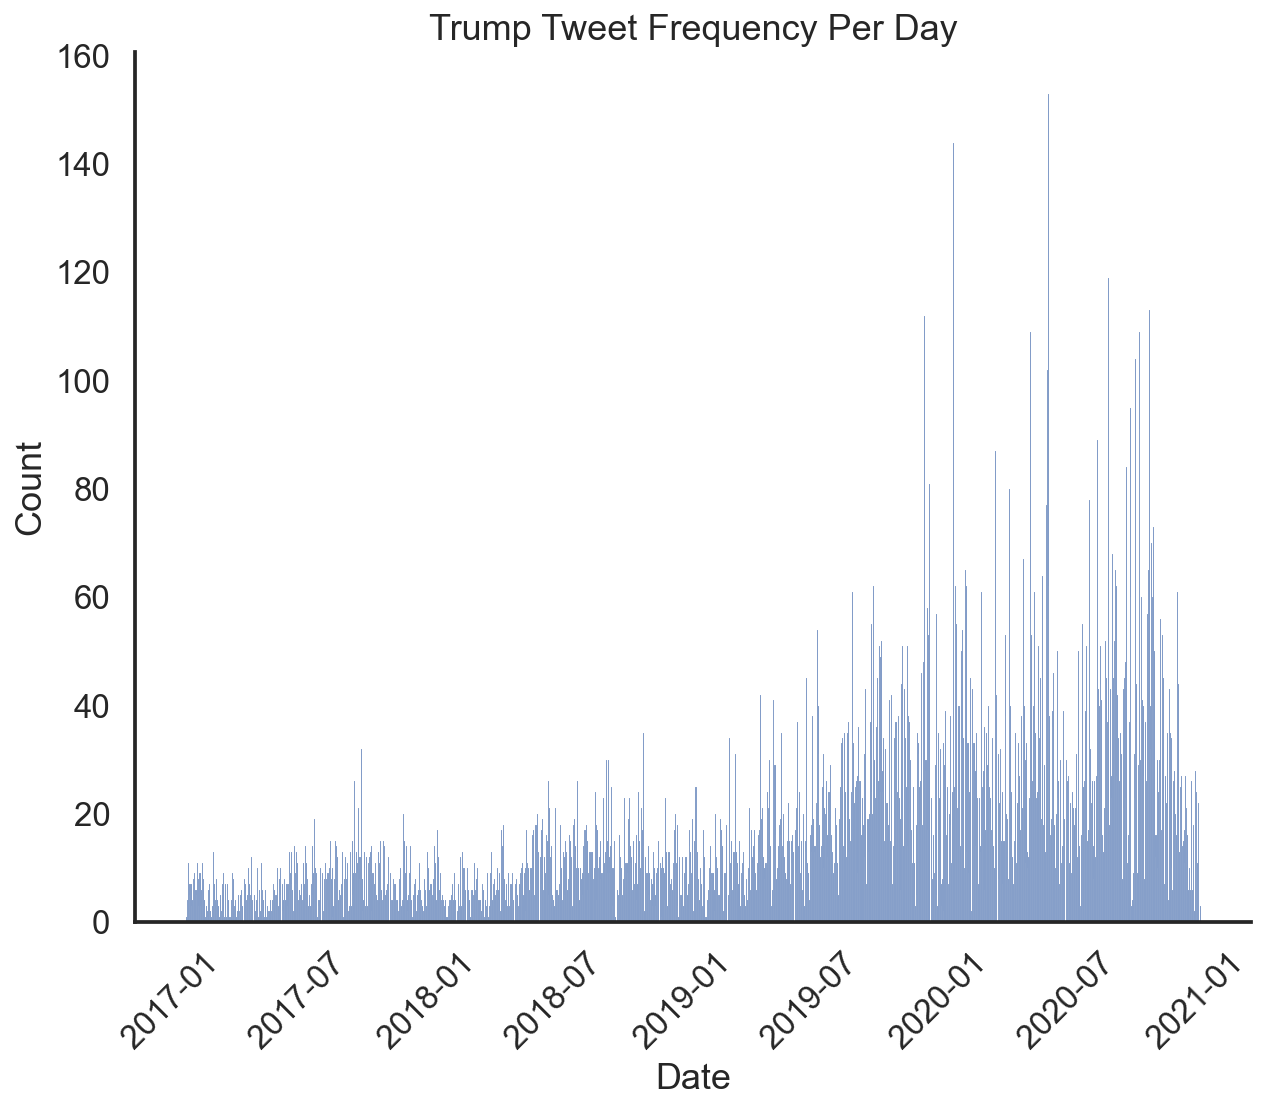

In [47]:
sns.histplot(data=tweets, x='date', bins=3*365 + 366) # Number of bins needed for every day in four years
plt.xticks(rotation=45);
plt.title('Trump Tweet Frequency Per Day');
sns.despine()
plt.xlabel('Date');

There seems to be an increasing number of daily tweets towards the end of the Trump presidency, though there are still large dips in the number of daily tweets throughout the entire time period. Surprisingly, the tweet count reached the hundreds, but after doing a quick check for relevant news articles, we can say that the data is accurate.

#### Poll Data

In [48]:
poll_list.describe()

,weight,adjustedApprove,adjustedDisapprove,sampleSize
count,16500.000000,16500.000000,16500.000000,16500.000000
mean,0.331903,41.657343,53.373442,3959.069737
std,0.482727,2.737078,2.648731,9590.526091
min,0.000000,25.157815,36.766580,121.000000
25%,0.105366,39.934719,51.795488,1000.000000
50%,0.125446,41.686784,53.343779,1500.000000
75%,0.218587,43.555458,55.055805,2092.000000
max,3.853043,54.837601,70.069753,325970.000000


From the overall trends, we can see that Trump's approval ratings were relatively low with an average of 41% and disapproval rating is quite high at 53%. The standard deviation for the averages is at about 2.6-2.7% suggesting that most of the adjusted poll ratings are close in their estimated and his approval ratings were reasonably steady in the large scale of things. We would have to be measuring small fluctuations in these ratings. We also see the mean and median are very similar so the data is symmetrically distributed.

The sample size of each individual poll is quite large, so it is fair to assume that if we aggregate the data, we would have a fair estimate of Trump's public perception. One thing to note is that the sample size has a very high standard deviation.

Here, we graph a distribution plot to figure out why the standard deviation is so high compared to the mean

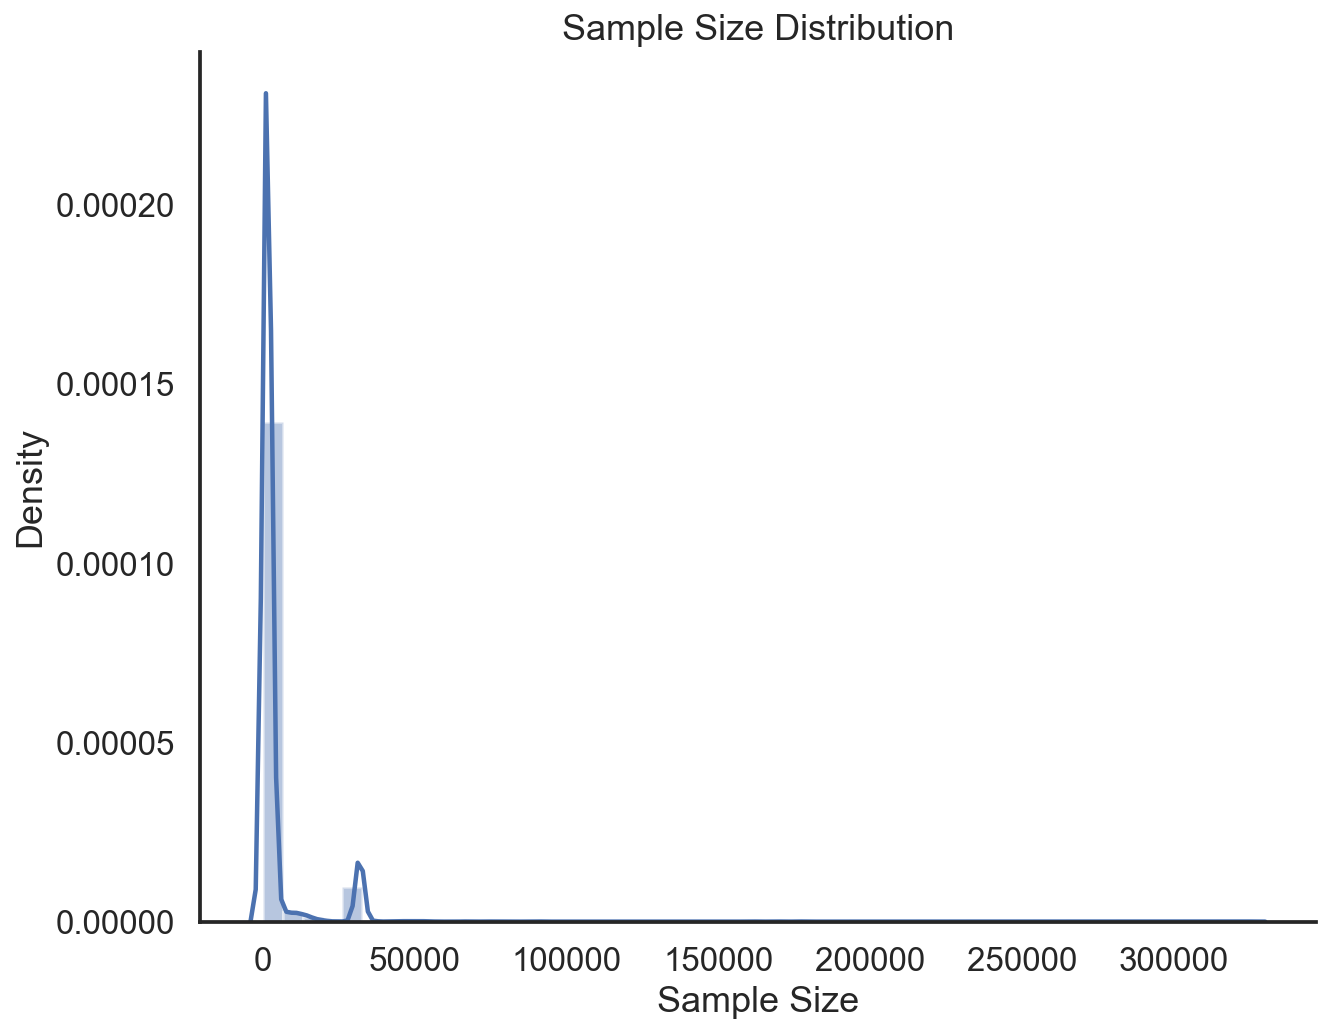

In [49]:
plot = sns.distplot(poll_list['sampleSize'], kde=True)
plot.set(title='Sample Size Distribution', xlabel='Sample Size')
sns.despine();

We see that the plot is heavily skewed right, which means there exist outliers that are increasing the standard deviation and mean, 9591 and 3959 respectively, while the median of the data is still fairly low, at 1500.
We also see that there is a large spike of polls with a sample size of 1500 and another small spike of polls with sample sizes around 30000.

Here, we check how the sample size of the polls affects the weights created by FiveThirtyEight.

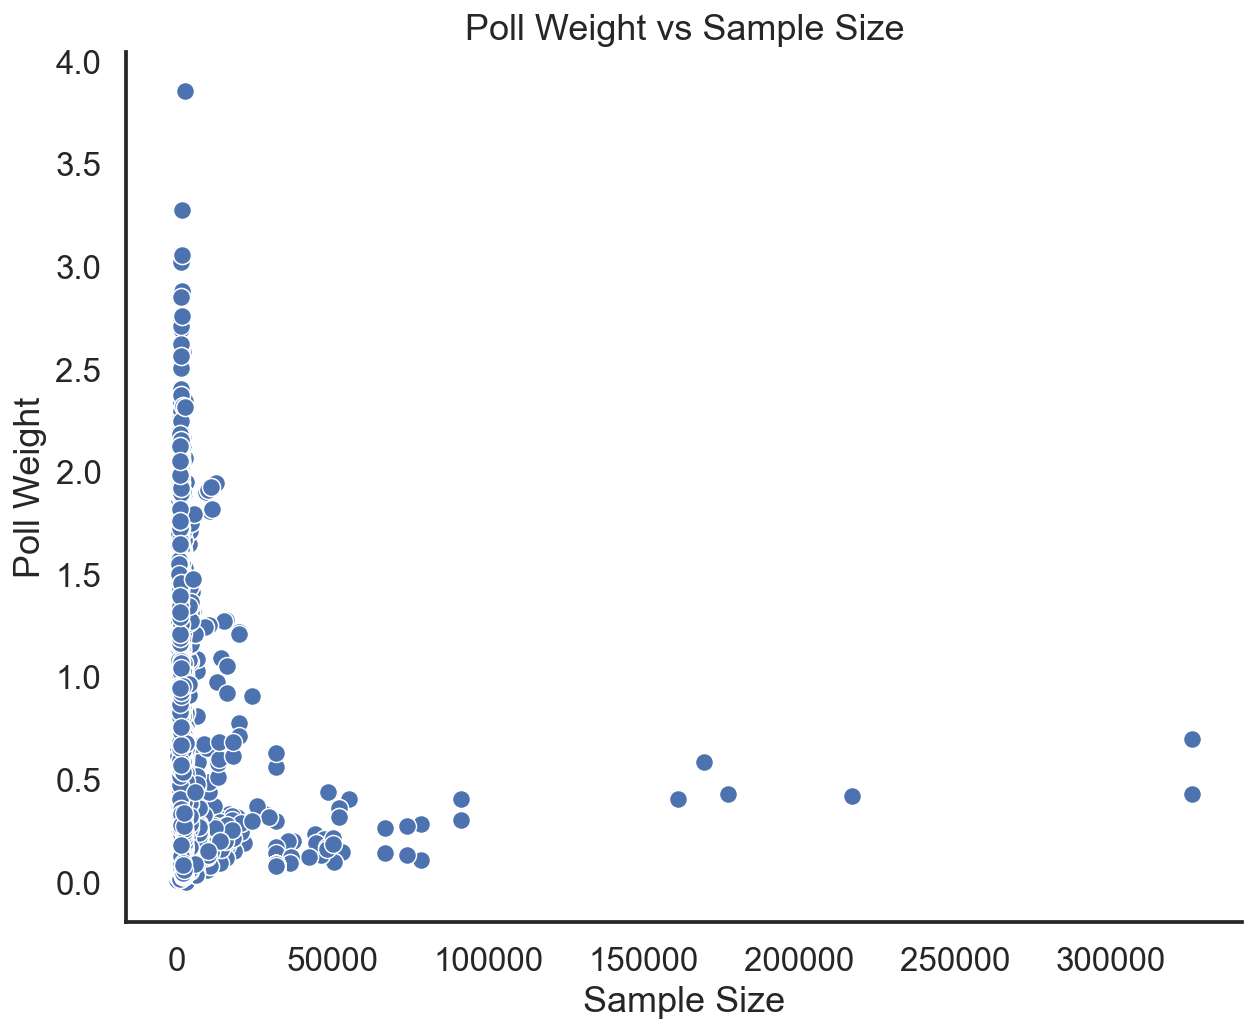

In [50]:
plot = sns.scatterplot(data=poll_list, x='sampleSize', y='weight')
plot.set(title='Poll Weight vs Sample Size', xlabel='Sample Size', ylabel='Poll Weight')
sns.despine();

We see that there are major outliers in the sample size with respect to the weight given. It seems that other factors may be taken into consideration while assigning weights to each poll since we do see some data points with high sample size and low weights, as well as low sample size with high weights.

In [51]:
poll_list.sort_values('weight', ascending=False).reset_index(drop=True).head() # Sort polls by weight

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize
0,SurveyUSA,2020-02-13,2020-02-17,3.853043,43.312646,52.436883,2768.0
1,SurveyUSA,2020-02-13,2020-02-17,3.853043,44.320837,51.779652,2768.0
2,University of Maryland/The Washington Post,2017-09-27,2017-10-05,3.276926,37.087203,61.890805,1663.0
3,University of Maryland/The Washington Post,2017-09-27,2017-10-05,3.276926,37.718064,61.689878,1663.0
4,Marist College,2019-12-09,2019-12-11,3.053792,42.268893,53.049562,1744.0


By sorting by weight, we can see that the highest weights were given to reputable pollsters despite the sample size being smaller than the mean.

In [52]:
poll_list.sort_values('sampleSize', ascending=False).reset_index(drop=True).head() # Sort polls by sampleSize

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize
0,SurveyMonkey,2020-10-01,2020-10-31,0.431053,42.613321,52.248116,325970.0
1,SurveyMonkey,2020-10-01,2020-10-31,0.695800,42.897876,51.434398,325970.0
2,SurveyMonkey,2020-07-01,2020-07-31,0.419623,40.694156,54.457367,216754.0
3,SurveyMonkey,2020-07-01,2020-07-31,0.419623,41.613321,54.248116,216754.0
4,SurveyMonkey,2020-08-01,2020-08-31,0.431305,41.694156,52.457367,177120.0


By sorting by sample size, we can see FiveThirtyEight handles weights through the credibility and accuracy of the pollster since SurveyMonkey's very large sample size is not weighted very high. Since SurveyMonkey crowdsources their data, the data is not likely to be a good representation of the US population.

##### Distribution of weight values 

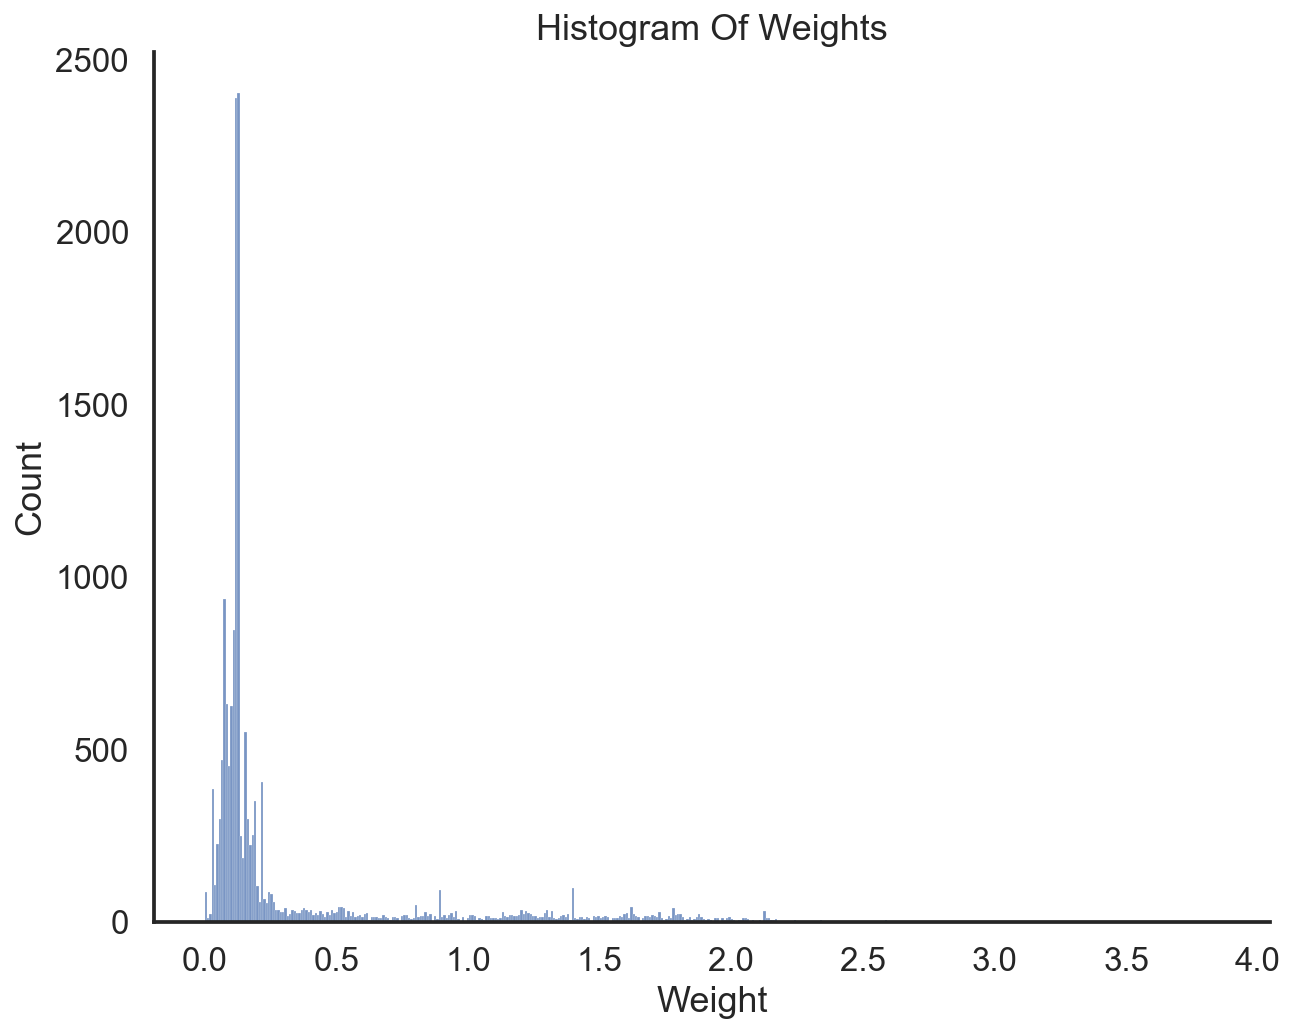

In [53]:
fig = sns.histplot(poll_list['weight'])

fig.set(title="Histogram Of Weights", xlabel='Weight', ylabel='Count');
sns.despine()

The histogram of the weights above is heavily right-skewed. We also note the outlier, SurveyUSA, with a weight value of 3.583043. With this weight range of 0 to 3.8, a summation of weights over a time period will be needed to aggregate polling data by the same time period. 

##### Lineplot for Approval Ratings Over Time

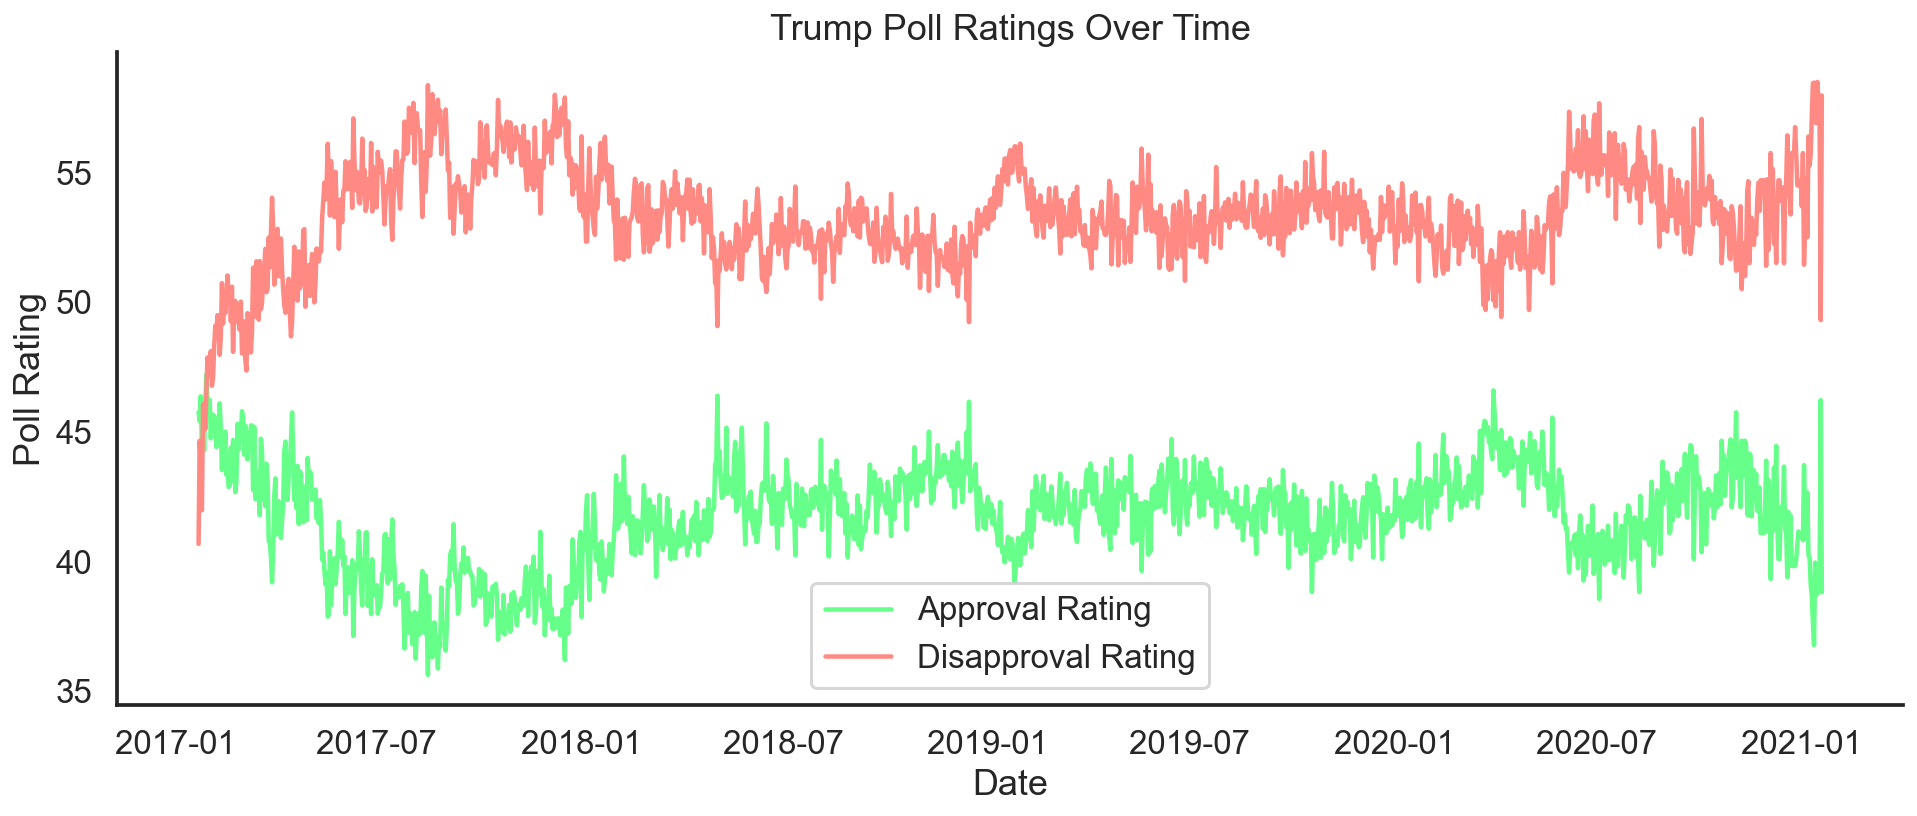

In [54]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='endDate', y='adjustedApprove', data=poll_list, ci=None, color=colors['approve'])
sns.lineplot(x='endDate', y='adjustedDisapprove', data=poll_list, ci=None, color=colors['disapprove'])
plt.title('Trump Poll Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Poll Rating')
plt.legend(labels=['Approval Rating', 'Disapproval Rating'])
sns.despine();

The overlap for the approval and disapproval rating at the beginning is interesting since the two variables are almost mirrored because they are dependent on each other. Presumably, the overlap is caused by a lack of polling data since the presidency just began and people haven't started "disapproving" Trump's actions just yet. It seems like certain events throughout the Trump presidency have caused his ratings to fluctuate wildly. However, this graph doesn't fully represent the data since it simply graphs all the values of the polls without aggregating and weighing the polls. This provides us with a general idea of how the graph should look, but there are outliers where this method does not work correctly since there is a large vertical spike of points towards the end of the presidency, where his ratings actually dropped rather than increased.

It is also worthwhile to note that the approval and disapproval ratings for each poll do not add up to 100%, meaning that the people getting surveyed have neutral options. This means that we have to do an analysis on the approval and disapproval ratings separately since although they are correlated, they are not exactly the same and they could represent different groups of people who may react differently to Trump's tweets.

### Distribution and Outliers

All values in the polling values are adjusted by weight and have high temporal connectivity. The following graphs will have outliers, as seen in the above graph where values near the beginning and end of the graph have drastically different values compared to the central areas of the graph. 

#### Approval Disapproval Histogram

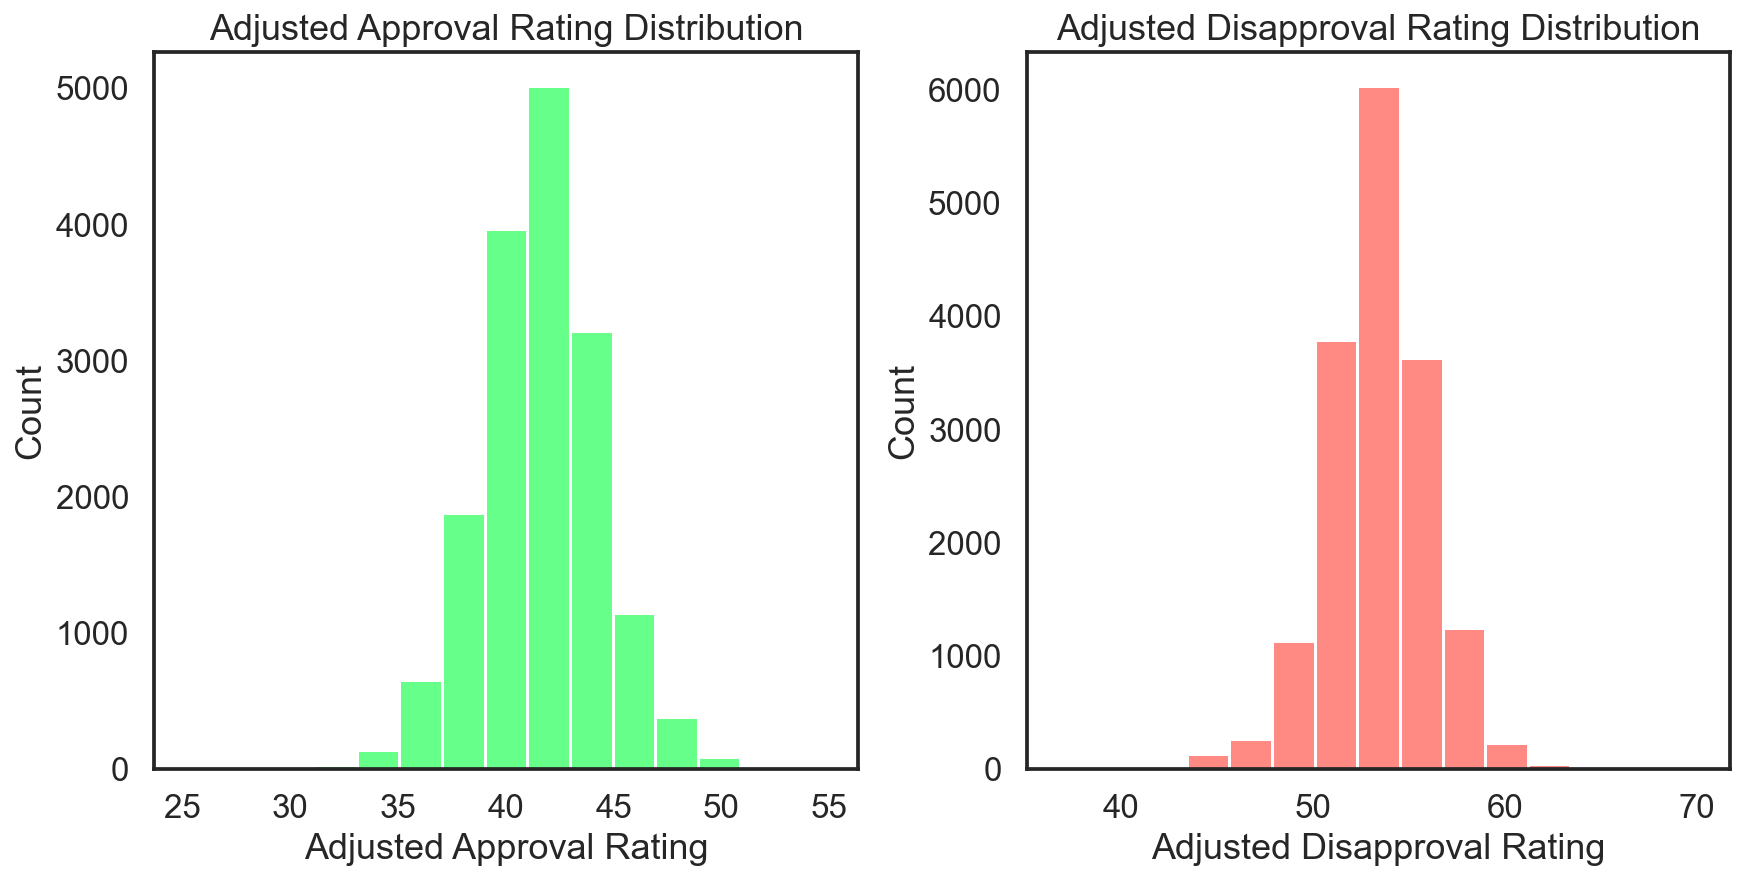

In [55]:
#Note differing y_max value
n_bins = 15

#1x2 grid of graphs, constrainted for clean look
fig, axs = plt.subplots(1,2, figsize=(12, 6), constrained_layout = True)

#Set axes lables
axs[0].set_title('Adjusted Approval Rating Distribution')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Adjusted Approval Rating')
axs[1].set_title('Adjusted Disapproval Rating Distribution')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Adjusted Disapproval Rating')

#Draw plots
axs[0].hist(poll_list['adjustedApprove'], bins=n_bins, color=colors['approve'])
axs[1].hist(poll_list['adjustedDisapprove'], bins=n_bins, color=colors['disapprove']);

In [56]:
stats.normaltest(poll_list['adjustedApprove'])

NormaltestResult(statistic=149.09107495089378, pvalue=4.219727672390052e-33)

In [57]:
stats.normaltest(poll_list['adjustedDisapprove'])

NormaltestResult(statistic=756.6685148463769, pvalue=4.914956587127122e-165)

Since the p-values are sufficiently small, then the data are distributed normally, so we can proceed with our analysis.

#### Histogram of polling time 

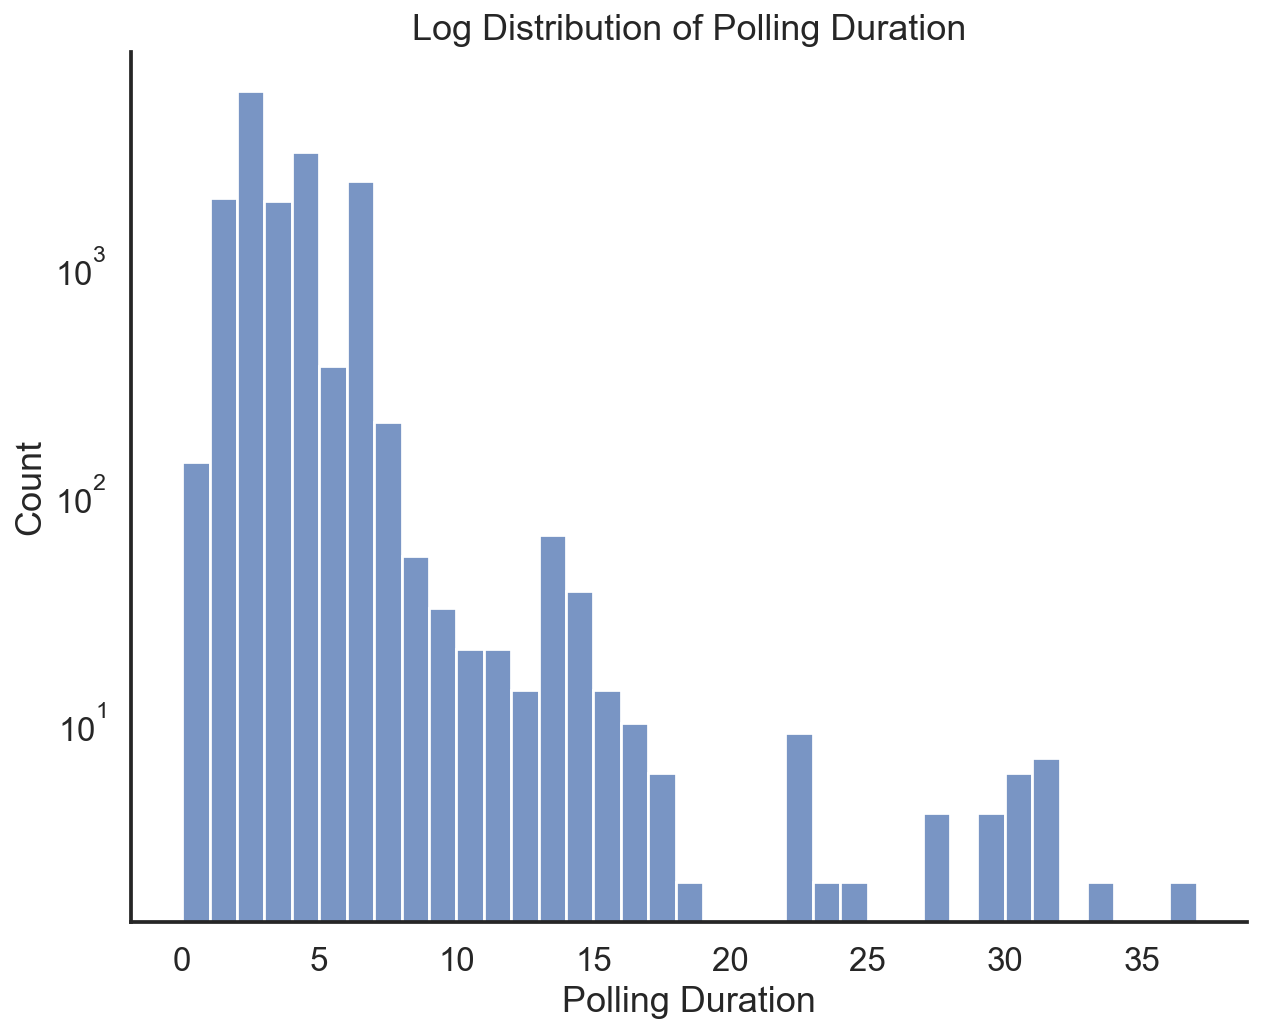

In [58]:
#Create polling duration via datetime difference with arg axis=1 to assert row based operation
poll_list['pollingDuration'] = poll_list.apply(lambda row: row['endDate'] - row['startDate'], axis=1)

plot = sns.histplot(x=poll_list['pollingDuration'].dt.days, data=poll_list['pollingDuration'], bins=37, log_scale=(False, 10))
plot.set(title='Log Distribution of Polling Duration', xlabel='Polling Duration')
sns.despine();

We see that the poll duration is skewed right, with outliers being in the 30-day polling range.

In [59]:
poll_list.describe()

,weight,adjustedApprove,adjustedDisapprove,sampleSize,pollingDuration
count,16500.000000,16500.000000,16500.000000,16500.000000,16500
mean,0.331903,41.657343,53.373442,3959.069737,3 days 07:09:54.327272727
std,0.482727,2.737078,2.648731,9590.526091,2 days 08:00:33.073887154
min,0.000000,25.157815,36.766580,121.000000,0 days 00:00:00
25%,0.105366,39.934719,51.795488,1000.000000,2 days 00:00:00
50%,0.125446,41.686784,53.343779,1500.000000,3 days 00:00:00
75%,0.218587,43.555458,55.055805,2092.000000,4 days 00:00:00
max,3.853043,54.837601,70.069753,325970.000000,37 days 00:00:00


We see that there is a max of 37 days for pollingDuration. This seems a little too long for our analysis. We're going to take a closer look at polls that lasted longer than 3 weeks.

In [60]:
poll_list[poll_list['pollingDuration']  >= datetime.timedelta(days=21)]

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize,pollingDuration
4297,USC Dornsife/Los Angeles Times,2017-12-15,2018-01-15,1.273620,34.776803,55.645536,3862.0,31 days
4298,USC Dornsife/Los Angeles Times,2017-12-15,2018-01-15,1.273620,34.393949,54.663376,3862.0,31 days
4743,Kaiser Family Foundation,2018-01-24,2018-02-22,2.166309,40.769187,55.413210,1850.0,29 days
4753,Kaiser Family Foundation,2018-01-24,2018-02-22,2.166309,40.070846,55.633466,1850.0,29 days
5346,AP-NORC,2018-03-21,2018-04-17,1.723593,39.088330,56.353891,2019.0,27 days
5350,AP-NORC,2018-03-21,2018-04-17,1.723593,38.358901,56.613477,2019.0,27 days
5646,Pew Research Center,2018-04-25,2018-05-17,0.980749,40.001807,53.885481,1380.0,22 days
5647,Pew Research Center,2018-04-25,2018-05-17,1.071774,38.162813,52.477711,1800.0,22 days
5650,Pew Research Center,2018-04-25,2018-05-17,1.071774,37.430471,52.741770,1800.0,22 days
6316,SurveyMonkey,2018-06-19,2018-07-20,0.317940,42.613321,52.248116,52211.0,31 days


There are a few polls with polling durations longer than 3 weeks. Polls over a long duration may not be well representative of the public's reaction to President Trump's daily tweets. With this in consideration, we felt that 1 week (7 days) would be sufficient time to gather data that is still pertinent to President Trump's tweets.

In [61]:
poll_list = poll_list[poll_list['pollingDuration'] <= datetime.timedelta(days=7)]
poll_list

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize,pollingDuration
0,Morning Consult,2017-01-20,2017-01-22,0.680029,45.686784,38.055805,1992.0,2 days
1,Morning Consult,2017-01-20,2017-01-22,0.681712,46.495997,37.343779,1992.0,2 days
2,Gallup,2017-01-20,2017-01-22,0.262323,44.957442,43.763923,1500.0,2 days
3,Gallup,2017-01-20,2017-01-22,0.262323,45.861441,43.539189,1500.0,2 days
4,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0,2 days
...,...,...,...,...,...,...,...,...
16495,YouGov,2021-01-16,2021-01-19,0.757434,42.948636,54.766580,1500.0,3 days
16496,American Research Group,2021-01-16,2021-01-19,1.314191,32.325063,63.443719,990.0,3 days
16497,AtlasIntel,2021-01-15,2021-01-19,1.476963,42.129162,55.774113,5188.0,4 days
16498,YouGov,2021-01-16,2021-01-19,0.757434,42.056827,55.140717,1500.0,3 days


In [62]:
poll_list['pollingDuration'].value_counts()

2 days    5915
4 days    3193
6 days    2393
1 days    2015
3 days    1950
5 days     369
7 days     209
0 days     139
Name: pollingDuration, dtype: int64

We also saw that there was a minimum of 0 days for some polling data, so we are taking a look at those data.

In [63]:
poll_list[poll_list['pollingDuration']  == datetime.timedelta(days=0)]

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize,pollingDuration
3668,Lucid,2017-11-21,2017-11-21,0.339731,39.423913,52.376816,985.0,0 days
3673,Lucid,2017-11-21,2017-11-21,0.339731,38.952191,52.403741,985.0,0 days
3844,Lucid,2017-12-05,2017-12-05,0.342289,36.202191,52.923741,859.0,0 days
3846,Lucid,2017-12-05,2017-12-05,0.342289,36.673913,52.896816,859.0,0 days
4093,Lucid,2017-12-26,2017-12-26,0.303048,37.492191,56.353741,698.0,0 days
...,...,...,...,...,...,...,...,...
16017,John Zogby Strategies/EMI Research Solutions,2020-11-01,2020-11-01,0.835453,47.427436,51.153073,1008.0,0 days
16029,John Zogby Strategies/EMI Research Solutions,2020-11-01,2020-11-01,0.835453,47.627149,51.039668,1008.0,0 days
16411,Marist College,2021-01-07,2021-01-07,1.549379,38.268893,59.049562,875.0,0 days
16416,Marist College,2021-01-07,2021-01-07,1.549379,39.050010,58.794843,875.0,0 days


Since we removed the hours from the dates in the Data Cleaning process, the dates were essentially rounded down. So polls that happened over a day, but not over 24 hours, became 0 days. These data will remain in the dataset because they fall within our range of 7 days or less.

#### Barplot Retweets/Flags/Deletes

This is a simple comparison of tweet conditions, flagged by Twitter censors, and deleted or retweeted by Trump. <br>
The graph does not show the total number of tweets because that number can be gleaned by looking at the shape of the tweets dataset. <br>
This also does not show the number of overlapping categories but the number of tweets under shared categories is shown below the charts.<br>

In [64]:
# Taking a look at the relationship between the boolean variables associated with the tweets
tweets_data = tweets[['isRetweet', 'isDeleted', 'isFlagged']].value_counts().reset_index()
tweets_data.rename(columns={0: 'count'}, inplace=True)
tweets_data

,isRetweet,isDeleted,isFlagged,count
0,0,0,0,15663
1,1,0,0,9179
2,0,1,0,652
3,1,1,0,421
4,0,0,1,250
5,1,0,1,54


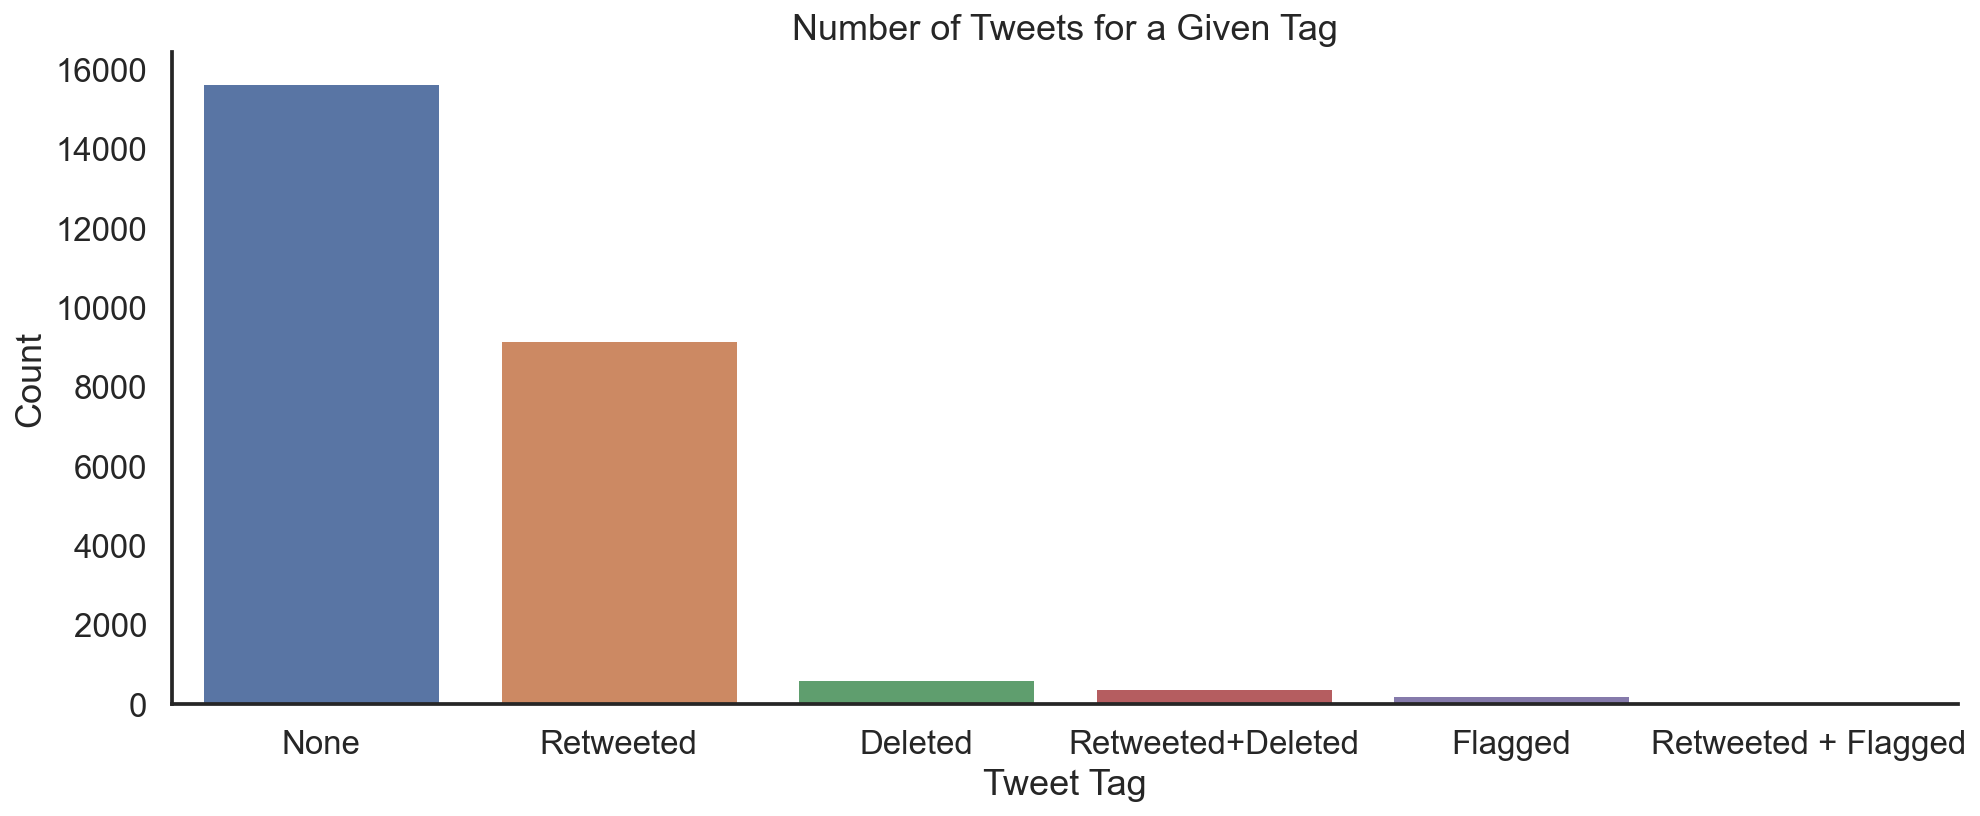

In [65]:
s=tweets_data.stack()
s.name='values'
df_tidy = s.reset_index()
df_tidy = df_tidy[df_tidy['level_1'] == 'count']

plt.figure(figsize=(16, 6))

plot = sns.barplot(data=df_tidy, x='level_0', y='values')

plot.set_title('Number of Tweets for a Given Tag')
plot.set_xlabel('Tweet Tag')
plot.set_ylabel('Count')
plot.set_xticklabels(labels=['None', 'Retweeted', 'Deleted', 'Retweeted+Deleted', 'Flagged', 'Retweeted + Flagged'])
sns.despine();

The value counts table and graph above show us how Trump's tweets are affected by each tag. From the table, we can see that the majority of his tweets are not tagged and are original tweets or retweets (first two rows of the dataframe). We see that there were a little over 1000 tweets deleted during Trump's time in office. We won't consider these tweets in further analysis since Twitter does not want deleted tweets to be used in data analysis.

In [66]:
# Remove all deleted tweets
tweets = tweets[tweets['isDeleted'] == 0]
tweets

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged
0,Busy week planned with a heavy focus on jobs a...,0,0,153674,21919,2017-01-23,0
1,Will be meeting at 9:00 with top automobile ex...,0,0,133949,19443,2017-01-24,0
2,A photo delivered yesterday that will be displ...,0,0,94364,17237,2017-01-24,0
3,Great meeting with automobile industry leaders...,0,0,85882,13257,2017-01-24,0
4,Signing orders to move forward with the constr...,0,0,113152,20935,2017-01-24,0
...,...,...,...,...,...,...,...
26214,These are the things and events that happen wh...,0,0,0,0,2021-01-06,0
26215,"THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...",0,0,344390,66595,2021-01-06,0
26216,"To all of those who have asked, I will not be ...",0,0,510761,83532,2021-01-08,0
26217,,0,0,629326,154877,2021-01-08,0


#### Tweet Text Data

We plan to look at the content of the tweets to see if it contributes to the approval ratings, so we'll take a look at the character count of tweets and add it as a column called "characterCount".

In [67]:
tweets['characterCount'] = tweets['text'].apply(lambda x: len(x))
tweets

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged,characterCount
0,Busy week planned with a heavy focus on jobs a...,0,0,153674,21919,2017-01-23,0,139
1,Will be meeting at 9:00 with top automobile ex...,0,0,133949,19443,2017-01-24,0,137
2,A photo delivered yesterday that will be displ...,0,0,94364,17237,2017-01-24,0,98
3,Great meeting with automobile industry leaders...,0,0,85882,13257,2017-01-24,0,104
4,Signing orders to move forward with the constr...,0,0,113152,20935,2017-01-24,0,118
...,...,...,...,...,...,...,...,...
26214,These are the things and events that happen wh...,0,0,0,0,2021-01-06,0,261
26215,"THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...",0,0,344390,66595,2021-01-06,0,137
26216,"To all of those who have asked, I will not be ...",0,0,510761,83532,2021-01-08,0,88
26217,,0,0,629326,154877,2021-01-08,0,0


In [68]:
tweets.describe()

,isRetweet,isDeleted,likes,retweets,isFlagged,characterCount
count,25146.000000,25146.0,2.514600e+04,25146.000000,25146.000000,25146.000000
mean,0.367176,0.0,5.924388e+04,17375.246282,0.012089,139.968265
std,0.482045,0.0,7.465352e+04,14848.657395,0.109287,82.383031
min,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000e+00,8664.000000,0.000000,83.000000
50%,0.000000,0.0,4.999100e+04,13663.500000,0.000000,140.000000
75%,1.000000,0.0,8.504025e+04,21079.000000,0.000000,190.000000
max,1.000000,0.0,1.869706e+06,408866.000000,1.000000,311.000000


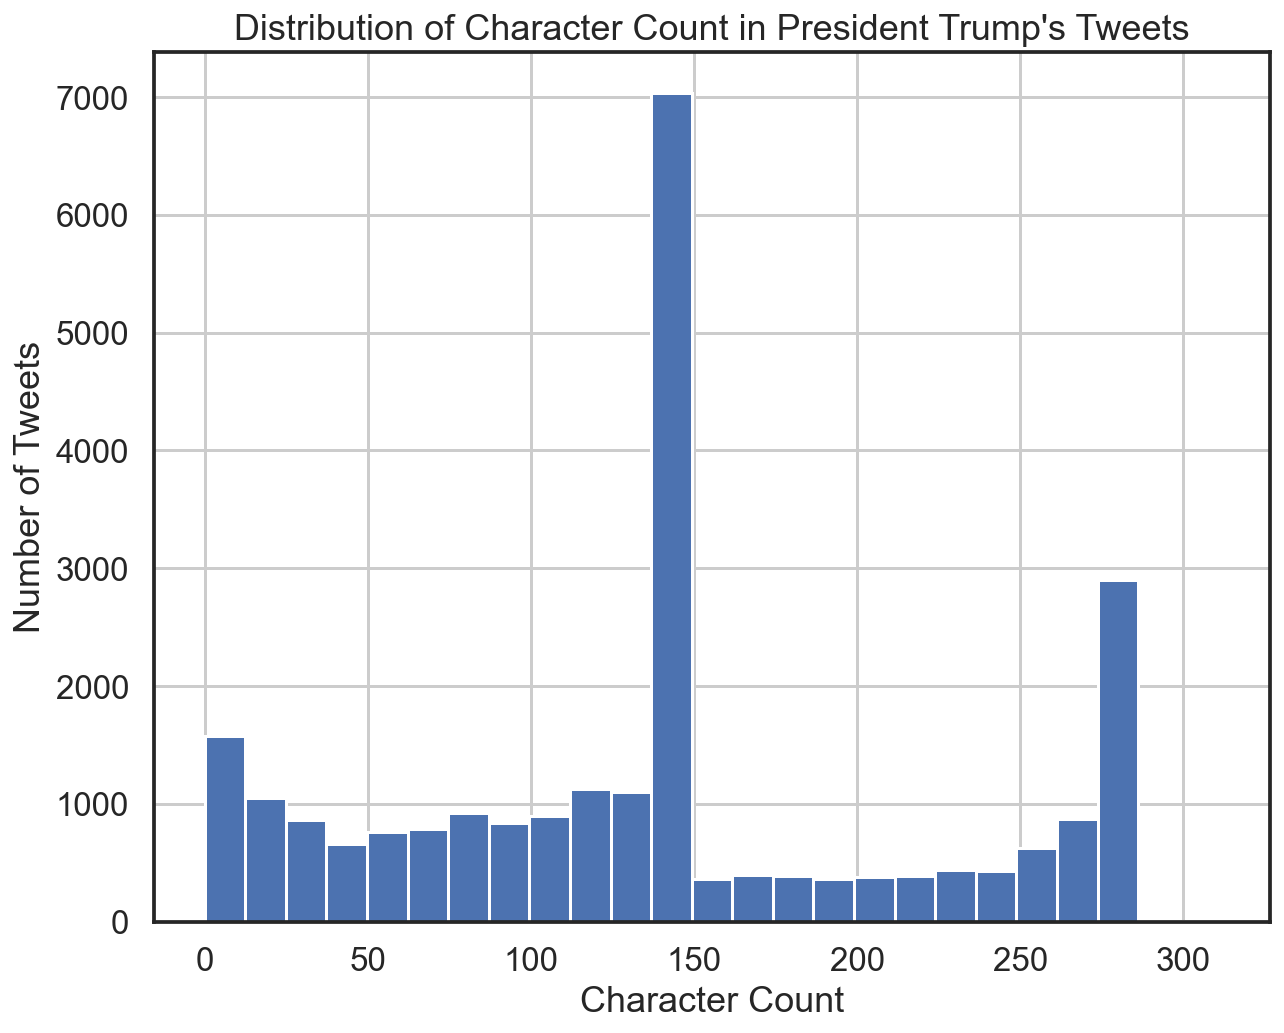

In [69]:
plot = tweets['characterCount'].hist(bins=25)
plot.set_title("Distribution of Character Count in President Trump's Tweets")
plot.set_xlabel('Character Count')
plot.set_ylabel('Number of Tweets');

Though not distinguishable in the bar plot, we look at any observations that should not possible, such that the message contained in the tweet are not greater than 280 characters. We infer their presence from the graph's x-axis and innocuous but clear gap on the right side of the graph 

In [70]:
print(len(tweets[tweets['characterCount'] > 280].iloc[0].text))
tweets[tweets['characterCount'] > 280].iloc[0].text

311


'@MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad policies & leadership. Must win again!  #MAGA'

In [71]:
print(len(tweets[tweets['characterCount'] > 280].iloc[1].text))
tweets[tweets['characterCount'] > 280].iloc[1].text

281


'"“One of the most disgraceful examples of an abuse of power by a government official...when you read this report...this is a systematic effort to go after Candidate Trump, President Elect-Trump, and President Trump....you could virtually call this an attempted coup."" @RepPeteKing'

The two above tweets will be considered anomalies as no other tweets in the dataset we are using had this issue.  
Twitter did implement a feature where: 
> "... you can tag up to 10 people in a photo and still have all 140 characters (280 characters as of Nov 2017) at your disposal,...". (https://blog.twitter.com/en_us/a/2014/photos-just-got-more-social.html)

This is a plausible explanation as to why these tweets are able to exist despite being over the 280 respective character limits.

Aside from the two anomalies, there exist two spikes in the graph. They are approximately at bins containing 140 and 280 characters and indicate that Trump frequently approached and used all 140 and 280 characters available to him in a significant number of his tweets.

Now that we have explored the variables, we can now proceed to aggregate the datasets to start answering the original question and test the hypothesis.

## Analysis

#### Tweet Sentiment Analysis
We thought the best way to analyze the content of Trump's tweets would be to conduct sentiment analysis on each individual tweet, since in-depth analysis of Trump's tweets would require a vast amount of information (like who/what events is each tweet referring to) which would would be very hard to analyze.   

In [72]:
analyser = SentimentIntensityAnalyzer()

tweets_list = list(tweets['text'].values)

In [73]:
def get_sentiment_comp(tweet):   
    # Apply analyser to text and retrieve only the compound score 
    return (analyser.polarity_scores(tweet))['compound']

In [74]:
tweets['compoundScore'] = tweets['text'].apply(get_sentiment_comp)

In [75]:
tweets.head()

,text,isRetweet,isDeleted,likes,retweets,date,isFlagged,characterCount,compoundScore
0,Busy week planned with a heavy focus on jobs a...,0,0,153674,21919,2017-01-23,0,139,0.4939
1,Will be meeting at 9:00 with top automobile ex...,0,0,133949,19443,2017-01-24,0,137,0.3382
2,A photo delivered yesterday that will be displ...,0,0,94364,17237,2017-01-24,0,98,0.4199
3,Great meeting with automobile industry leaders...,0,0,85882,13257,2017-01-24,0,104,0.6588
4,Signing orders to move forward with the constr...,0,0,113152,20935,2017-01-24,0,118,0.0000


In [76]:
# Total entries with true neutral Vader scores
len((tweets[tweets['compoundScore'] == 0.00]))

5403

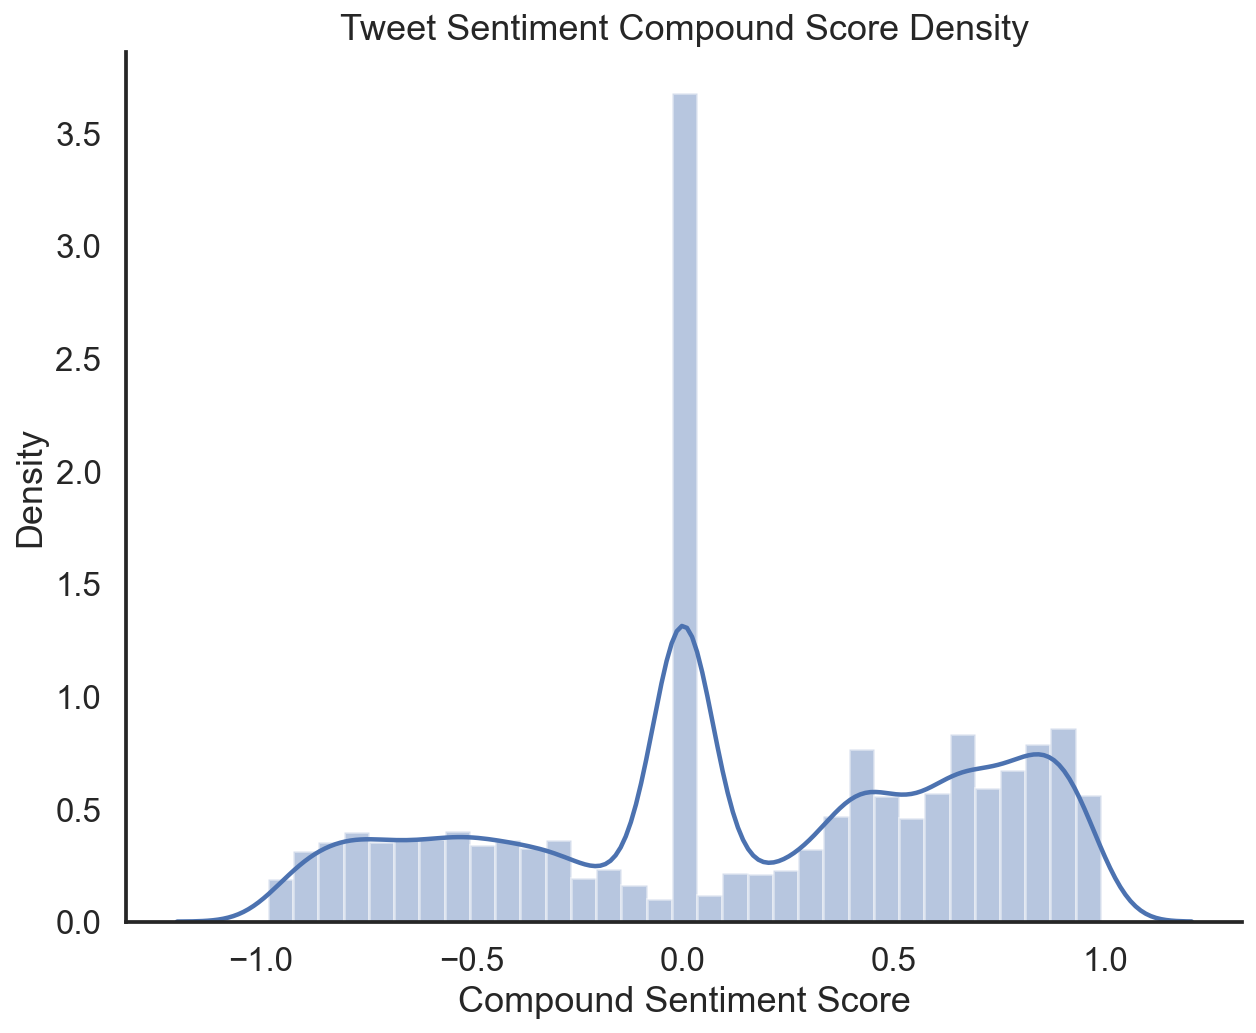

In [77]:
# Dist plot of all scores
plot = sns.distplot(tweets['compoundScore'])
plot.set(title='Tweet Sentiment Compound Score Density', xlabel = 'Compound Sentiment Score')
sns.despine();

We see that there is a lot of data that have a compound sentiment score of 0, representing that they are neutral. Since our question cares about how his tweets may sway his audience, it is not necessary to look at neutral data.

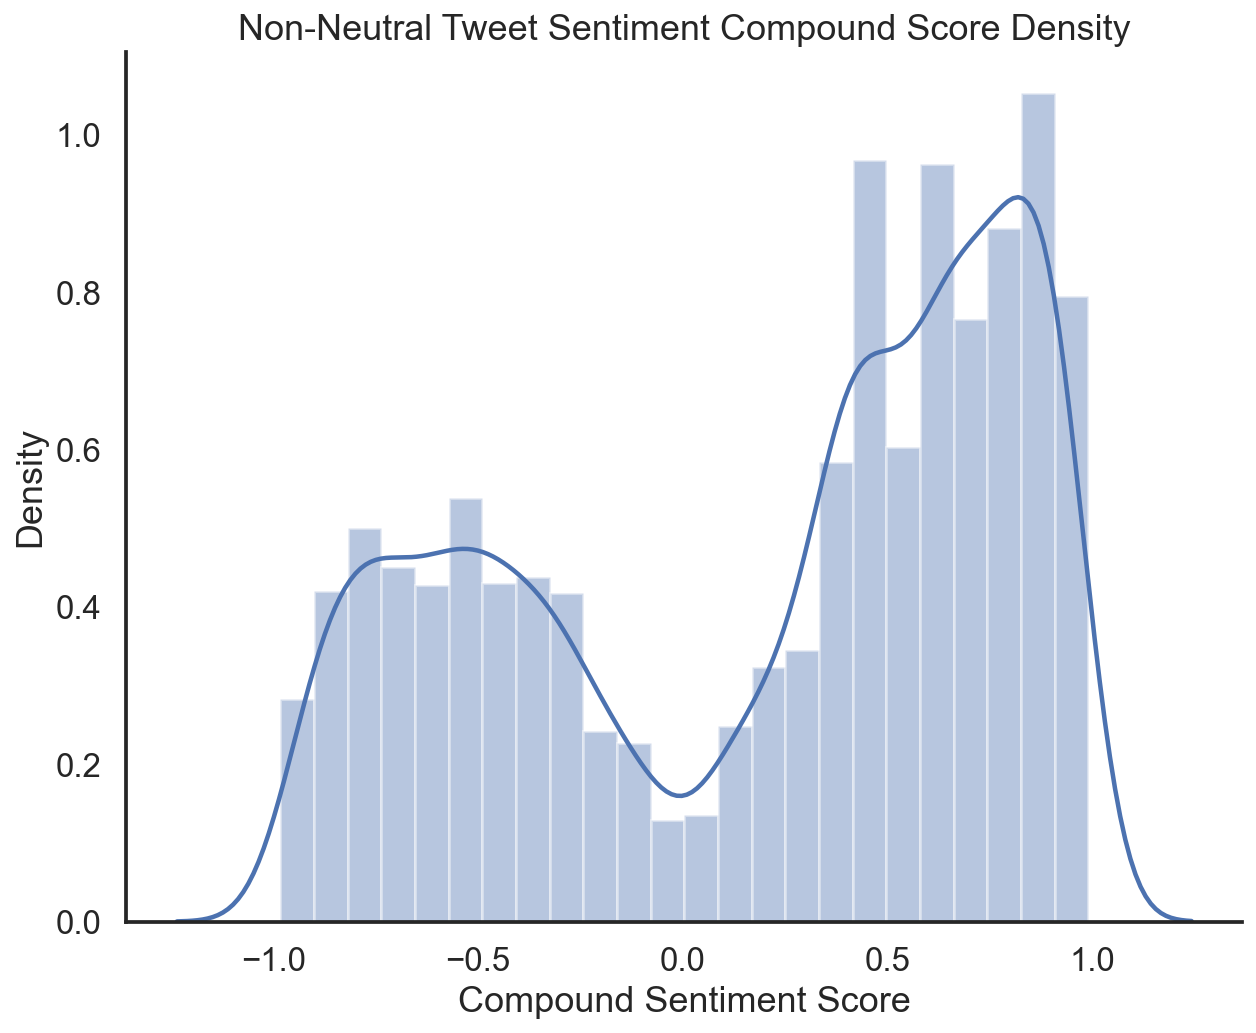

In [78]:
# View outliers without neutral (compund = 0) scores

emotional_tweets = (tweets[tweets['compoundScore'] != 0.00])

plot = sns.distplot(emotional_tweets['compoundScore'])
plot.set(title='Non-Neutral Tweet Sentiment Compound Score Density', xlabel='Compound Sentiment Score')
sns.despine();

We can see from this graph that there are more positive tweets than negative ones.  
Now that we have an idea of what our data looks like, we can start joining our datasets for further analysis.

#### Joining Datasets
In order to look for correlation between the frequency and content of Trump's tweets and his approval rating, we will have to join the datasets of his polls and his tweets. 

Since we want to merge the two datasets, we want to check if there are dates on which Trump didn't tweet or if there are no polls that started. We want to focus on the start of the polls since if there is any correlation between tweets and Trump's presidential approval rating, the polls have to be open for the people polled to express their reaction. Below we are looking for missing dates from Trump's inauguration to the date his Twitter account was suspended.

In [79]:
pd.date_range(start='2017-01-20', end='2021-01-8').difference(tweets.date)

DatetimeIndex(['2017-01-20', '2017-01-21', '2017-01-22', '2017-04-15',
               '2017-06-08', '2018-01-30', '2018-02-26', '2018-05-06',
               '2018-06-10', '2018-09-28', '2019-03-23', '2021-01-07'],
              dtype='datetime64[ns]', freq=None)

In [80]:
pd.date_range(start='2017-01-20', end='2021-01-8').difference(poll_list.startDate)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

There are no missing dates in the poll data and there are only a few dates that Trump didn't tweet on.

In [81]:
# Generate a Series of all dates

tweet_dates = pd.DataFrame(pd.date_range(start='2017-01-20', end='2021-01-20'))
tweet_dates.columns = ['date']

In [82]:
# Generating a new dataframe for the frequency of Trump's tweets, up until the end of his presidency
# Gets the count of appearances of tweets for each date, then names the value column to "date",
# then moved dates out of the index column and named the counts column to "frequency", and finally,
# sorts the dataframe by date and resets the index.
tweet_freq = tweets['date'].value_counts().rename_axis('date').reset_index(name='frequency').sort_values('date').reset_index(drop=True)
tweet_freq.head()

,date,frequency
0,2017-01-23,1
1,2017-01-24,4
2,2017-01-25,8
3,2017-01-26,10
4,2017-01-27,7


In [83]:
# Merging the two dataframes above to get a frequency
tweet_freq = tweet_dates.merge(tweet_freq, on='date', how='left')
tweet_freq

,date,frequency
0,2017-01-20,NaN
1,2017-01-21,NaN
2,2017-01-22,NaN
3,2017-01-23,1.0
4,2017-01-24,4.0
...,...,...
1457,2021-01-16,NaN
1458,2021-01-17,NaN
1459,2021-01-18,NaN
1460,2021-01-19,NaN


In [84]:
# Replace NaN values with 0, since it means there were no tweets on that day and change frequency back
# to ints since they got changed to floats when NaNs were added during the merge.
tweet_freq['frequency'] = tweet_freq['frequency'].fillna(0).apply(lambda x: int(x))
tweet_freq.head()

,date,frequency
0,2017-01-20,0
1,2017-01-21,0
2,2017-01-22,0
3,2017-01-23,1
4,2017-01-24,4


We also want to get the sentiment rating of Trump's tweets per day in order to fully merge the datasets.

In [85]:
#Data frame of compound scores attached to days to sum on day by day basis
daily_comp_agg = tweets.groupby(['date']).agg({'compoundScore': np.mean})
daily_comp_agg.head()

,compoundScore
date,
2017-01-23,0.493900
2017-01-24,0.354225
2017-01-25,0.058888
2017-01-26,0.045190
2017-01-27,0.287157


Now that we have the tweet frequency per day and sentiment ratings of his tweets per day, we can group the dataframes.

In [86]:
tweet_freq = tweet_freq.merge(daily_comp_agg, on='date', how='left')

Since the poll_list dataframe has a date range and the data from the tweets are single days, then we will take the average of the tweet data during each polling period and add it onto the dataframe.

In [87]:
# function to get average of the values in a column that fall between the desired dates
def get_date_range_average(start_date, end_date, column):
    mask = (tweet_freq['date'] >= start_date) & (tweet_freq['date'] <= end_date) # creates a date range
    return tweet_freq.loc[mask][column].mean() # creates a dataframe with desired date range and takes the mean of the desired column

In [88]:
# applying function to merge the tweet and polling data
merged_poll_list = poll_list.copy()
merged_poll_list['tweets/day'] = poll_list.apply(lambda x: get_date_range_average(x.startDate, x.endDate, 'frequency'), axis=1)
merged_poll_list['aggrCompound/day'] = poll_list.apply(lambda x: get_date_range_average(x.startDate, x.endDate, 'compoundScore'), axis=1)
merged_poll_list

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize,pollingDuration,tweets/day,aggrCompound/day
0,Morning Consult,2017-01-20,2017-01-22,0.680029,45.686784,38.055805,1992.0,2 days,0.000000,NaN
1,Morning Consult,2017-01-20,2017-01-22,0.681712,46.495997,37.343779,1992.0,2 days,0.000000,NaN
2,Gallup,2017-01-20,2017-01-22,0.262323,44.957442,43.763923,1500.0,2 days,0.000000,NaN
3,Gallup,2017-01-20,2017-01-22,0.262323,45.861441,43.539189,1500.0,2 days,0.000000,NaN
4,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0,2 days,0.333333,0.4939
...,...,...,...,...,...,...,...,...,...,...
16495,YouGov,2021-01-16,2021-01-19,0.757434,42.948636,54.766580,1500.0,3 days,0.000000,NaN
16496,American Research Group,2021-01-16,2021-01-19,1.314191,32.325063,63.443719,990.0,3 days,0.000000,NaN
16497,AtlasIntel,2021-01-15,2021-01-19,1.476963,42.129162,55.774113,5188.0,4 days,0.000000,NaN
16498,YouGov,2021-01-16,2021-01-19,0.757434,42.056827,55.140717,1500.0,3 days,0.000000,NaN


Since the function we applied grabs all the tweets within the polling timeframe, the only rows with null values are polls where Trump never tweeted during the polling duration. Since we are looking into whether tweet frequency affects approval ratings and content affects approval ratings, we will have to approach those analyses differently.

When we are looking to see how the frequency of Trump's tweets affect the polling numbers, we will retain the polls where the tweets/day is 0, since there is a chance that not tweeting may affect Trump's ratings. However, when we are looking to see how the content of the tweets affect the polling numbers, we will drop the polls with no tweets when we analyze the sentiment values. 

In [89]:
# making a copy of the DataFrame so we can continue to do aggregation by dropping 
merged_poll_dropped = merged_poll_list.copy()
merged_poll_dropped = merged_poll_dropped.dropna(how='any').reset_index(drop=True)

In [90]:
merged_poll_dropped.head()

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize,pollingDuration,tweets/day,aggrCompound/day
0,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0,2 days,0.333333,0.493900
1,Gallup,2017-01-21,2017-01-23,0.242845,44.957442,44.763923,1500.0,2 days,0.333333,0.493900
2,Rasmussen Reports/Pulse Opinion Research,2017-01-22,2017-01-24,0.200411,51.608387,44.626013,1500.0,2 days,1.666667,0.424063
3,Ipsos,2017-01-20,2017-01-24,0.153481,43.451563,43.780389,1632.0,4 days,1.000000,0.424063
4,Public Policy Polling,2017-01-23,2017-01-24,1.116294,43.608485,44.209337,1043.0,1 days,2.500000,0.424063


#### Linear Regression On Approval Ratings and Tweet Frequency

We want to see if there is a correlation between Trump's tweet frequency and his approval ratings. To do this, we will run a linear regression on these data.

Let's start by taking a look at the distribution in terms of the approval rating and tweets/day so we can get a quick idea is there is any obvious correlation between the two statistics.

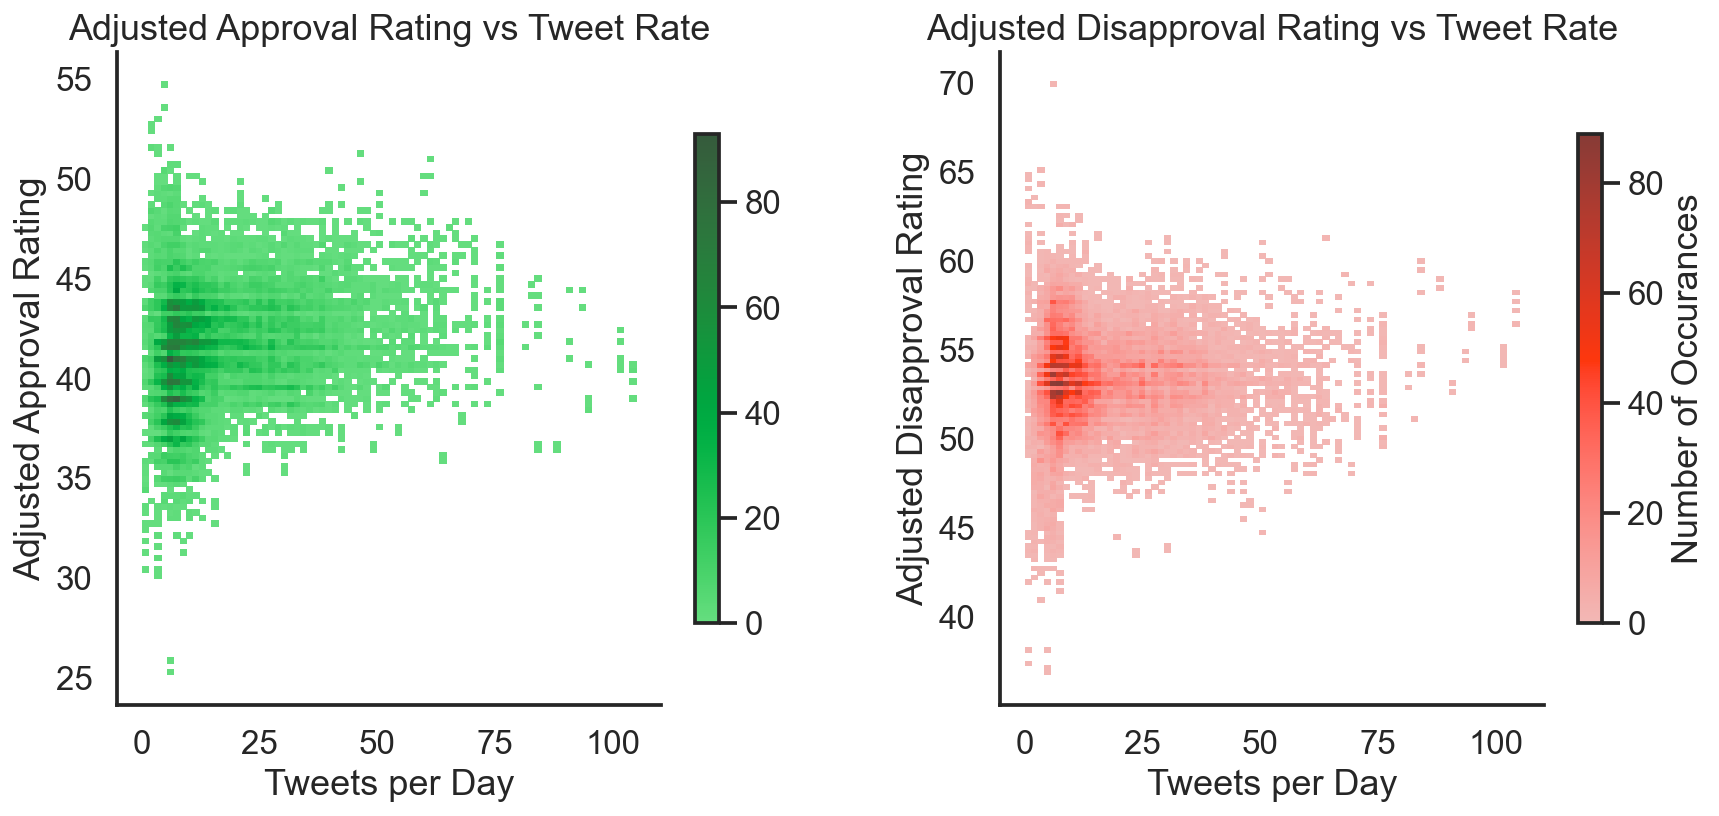

In [91]:
fig, axs = plt.subplots(1,2, figsize=(14, 6), constrained_layout = True)
fig.subplots_adjust(wspace=0.3)

plot1 = sns.histplot(ax=axs[0], x='tweets/day', y='adjustedApprove', data=merged_poll_list, color=colors['approve'], cbar=True, cbar_kws={'shrink': .75})
plot1.set(title='Adjusted Approval Rating vs Tweet Rate', xlabel='Tweets per Day', ylabel='Adjusted Approval Rating')
sns.despine();

plot2 = sns.histplot(ax=axs[1], x='tweets/day', y='adjustedDisapprove', data=merged_poll_list, color=colors['disapprove'], cbar=True, cbar_kws={'shrink': .75, 'label': 'Number of Occurances'})
plot2.set(title='Adjusted Disapproval Rating vs Tweet Rate', xlabel='Tweets per Day', ylabel='Adjusted Disapproval Rating')
sns.despine();

This graph is used to see if tweet frequency affects Trump's approval/disapproval rating. We can see that there is a good amount of data points where tweets per day is very high, but the approval rating still sits around 40-45 while the disapproval rating sits around 55. We can also see that there is a good amount of data points where tweets per day is low, but the approval/disapproval rating is high. From this, it is hard to discern if there is a correlation.

Since these two graphs are skewed right, we want to normalize the independent variable to run linear regression on it.

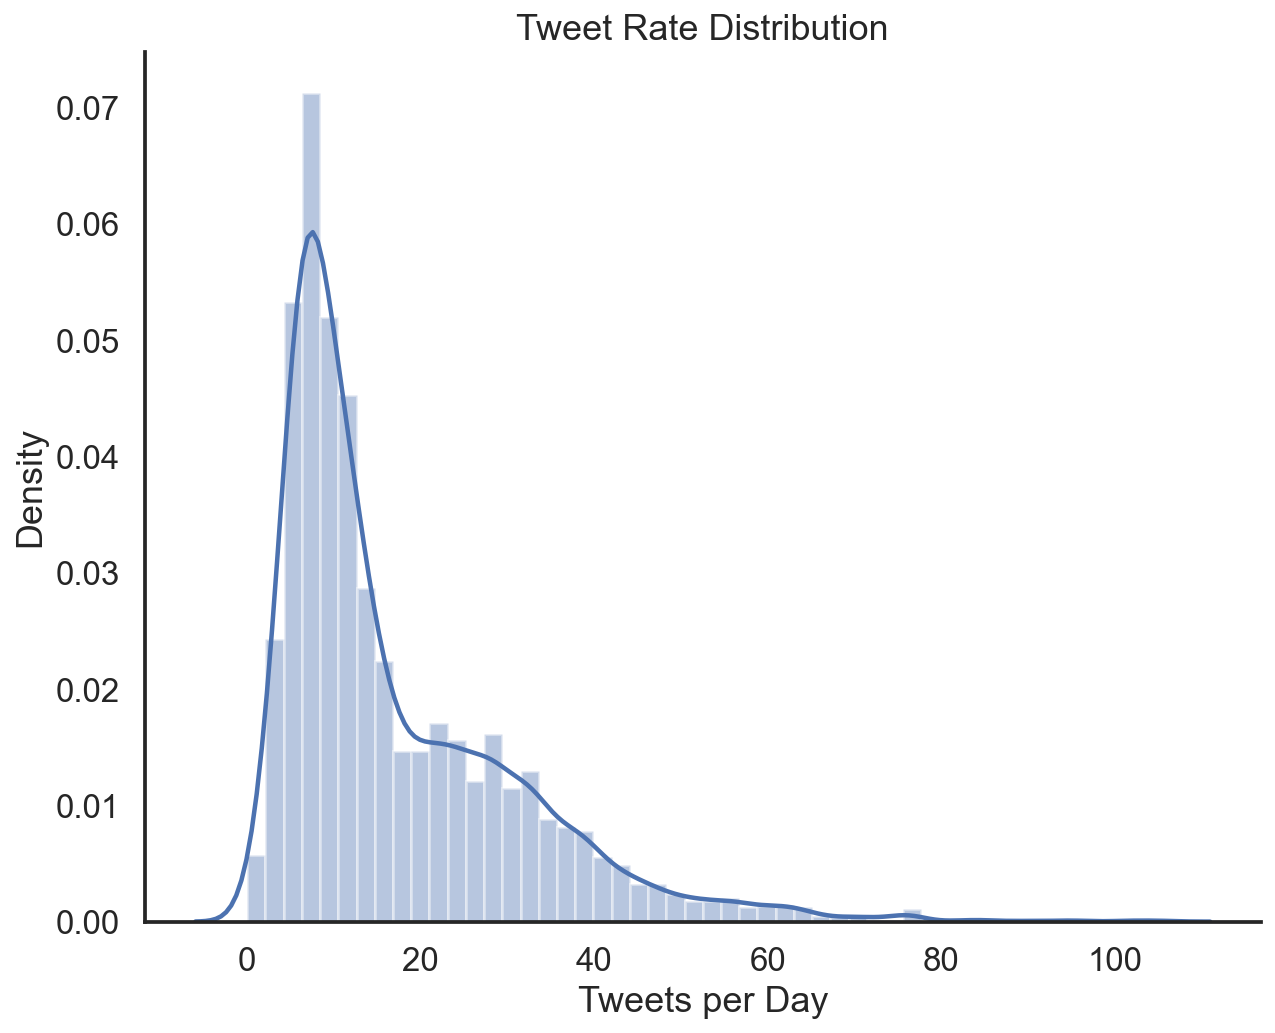

In [92]:
# Taking a look at the tweets/day variable
plot = sns.distplot(merged_poll_list['tweets/day']);
plot.set(title='Tweet Rate Distribution', xlabel='Tweets per Day')
sns.despine();

We can see that our independent variable is not normalized, so we will try to normalize it for better results by using the log scale.

In [93]:
# Using the data without 0s to take the log10 of the x variable
merged_poll_list['normTweetRate'] = merged_poll_list['tweets/day'].apply(lambda x: np.log10(x+1))
merged_poll_list

,pollster,startDate,endDate,weight,adjustedApprove,adjustedDisapprove,sampleSize,pollingDuration,tweets/day,aggrCompound/day,normTweetRate
0,Morning Consult,2017-01-20,2017-01-22,0.680029,45.686784,38.055805,1992.0,2 days,0.000000,NaN,0.000000
1,Morning Consult,2017-01-20,2017-01-22,0.681712,46.495997,37.343779,1992.0,2 days,0.000000,NaN,0.000000
2,Gallup,2017-01-20,2017-01-22,0.262323,44.957442,43.763923,1500.0,2 days,0.000000,NaN,0.000000
3,Gallup,2017-01-20,2017-01-22,0.262323,45.861441,43.539189,1500.0,2 days,0.000000,NaN,0.000000
4,Gallup,2017-01-21,2017-01-23,0.242845,45.861441,44.539189,1500.0,2 days,0.333333,0.4939,0.124939
...,...,...,...,...,...,...,...,...,...,...,...
16495,YouGov,2021-01-16,2021-01-19,0.757434,42.948636,54.766580,1500.0,3 days,0.000000,NaN,0.000000
16496,American Research Group,2021-01-16,2021-01-19,1.314191,32.325063,63.443719,990.0,3 days,0.000000,NaN,0.000000
16497,AtlasIntel,2021-01-15,2021-01-19,1.476963,42.129162,55.774113,5188.0,4 days,0.000000,NaN,0.000000
16498,YouGov,2021-01-16,2021-01-19,0.757434,42.056827,55.140717,1500.0,3 days,0.000000,NaN,0.000000


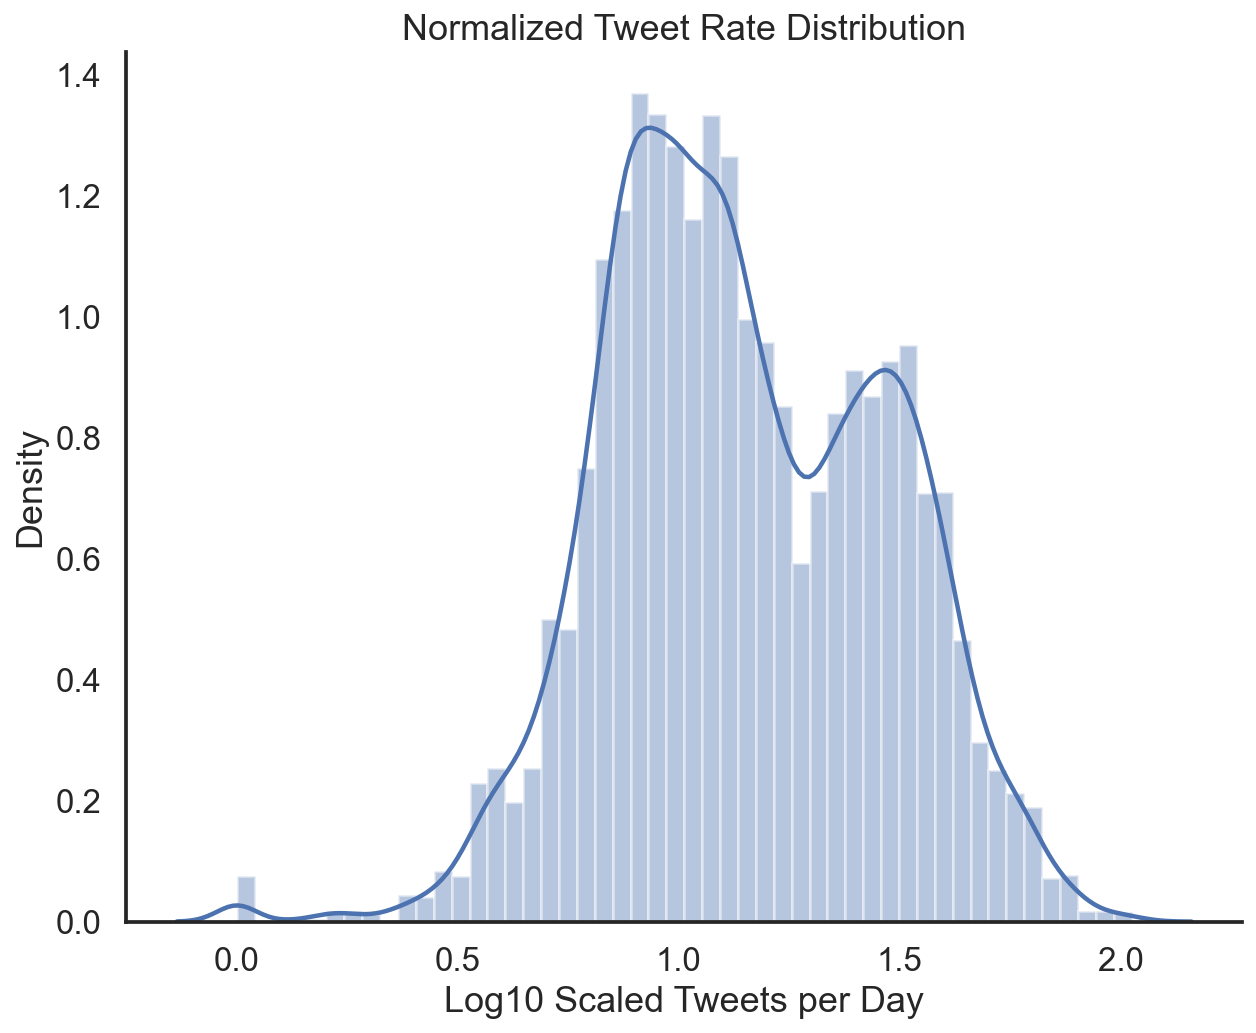

In [94]:
# After taking the log scale of tweets/day
plot = sns.distplot(merged_poll_list['normTweetRate']);
plot.set(title='Normalized Tweet Rate Distribution', xlabel = 'Log10 Scaled Tweets per Day')
sns.despine();

Now that we've log scaled our independent variable, we can see that the distribution looks less skewed. Let's check if it's normal so that we can continue with our analysis.

In [95]:
# Doing a normal test on the new column
stats.normaltest(merged_poll_list['normTweetRate'])

NormaltestResult(statistic=39.30248380200365, pvalue=2.9212860165284437e-09)

Since the p-value is very small, our independent variable is relatively normalized, so we can continue with our analysis.

Let's now take a look again at the distribution in terms of the approval rating and our now normalized tweets/day

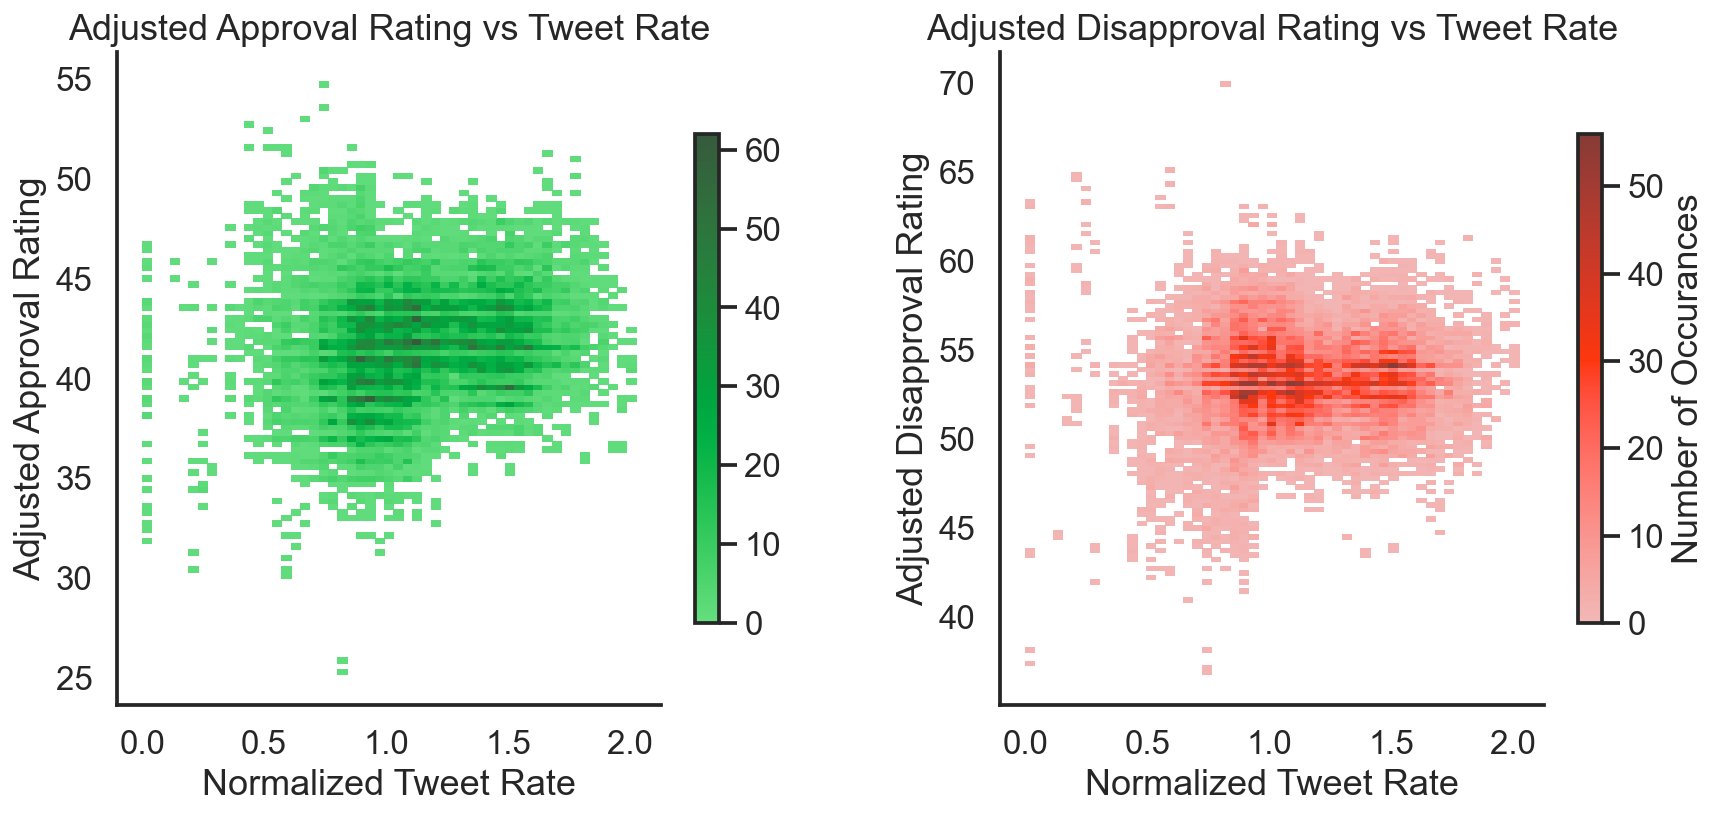

In [96]:
fig, axs = plt.subplots(1,2, figsize=(14, 6), constrained_layout = True)
fig.subplots_adjust(wspace=0.3)

plot1 = sns.histplot(ax=axs[0], x='normTweetRate', y='adjustedApprove', data=merged_poll_list, color=colors['approve'], cbar=True, cbar_kws={'shrink': .75})
plot1.set(title='Adjusted Approval Rating vs Tweet Rate', xlabel='Normalized Tweet Rate', ylabel='Adjusted Approval Rating')
sns.despine();

plot2 = sns.histplot(ax=axs[1], x='normTweetRate', y='adjustedDisapprove', data=merged_poll_list, color=colors['disapprove'], cbar=True, cbar_kws={'shrink': .75, 'label': 'Number of Occurances'})
plot2.set(title='Adjusted Disapproval Rating vs Tweet Rate', xlabel='Normalized Tweet Rate', ylabel='Adjusted Disapproval Rating')
sns.despine();

From the graphs alone, it seems unlikely that the variables have any correlation even after normalizing the tweet rate. Now that we've seen our data distribution and couldn't discern if there are any obvious correlations, we will start running linear regression between approval ratings and tweet frequency.

In [97]:
outcome_approve, predictors_approve = patsy.dmatrices('adjustedApprove ~ normTweetRate', merged_poll_list)
model_approve = sm.OLS(outcome_approve, predictors_approve)
result_approve = model_approve.fit()
print(result_approve.summary())

                            OLS Regression Results                            
Dep. Variable:        adjustedApprove   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     571.9
Date:                Mon, 15 Mar 2021   Prob (F-statistic):          3.02e-124
Time:                        13:16:52   Log-Likelihood:                -38878.
No. Observations:               16183   AIC:                         7.776e+04
Df Residuals:                   16181   BIC:                         7.777e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        39.8246      0.080    500.539

In [98]:
outcome_disapprove, predictors_disapprove = patsy.dmatrices('adjustedDisapprove ~ normTweetRate', merged_poll_list)
model_disapprove = sm.OLS(outcome_disapprove, predictors_disapprove)
result_disapprove = model_disapprove.fit()
print(result_disapprove.summary())

                            OLS Regression Results                            
Dep. Variable:     adjustedDisapprove   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.919
Date:                Mon, 15 Mar 2021   Prob (F-statistic):            0.00283
Time:                        13:16:52   Log-Likelihood:                -38600.
No. Observations:               16183   AIC:                         7.720e+04
Df Residuals:                   16181   BIC:                         7.722e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.1459      0.078    679.512

The code above shows the relationship between the log10 scale of the tweet frequency for the polling period of each poll compared to ratings from the poll. Because the beta coefficients are done on the log scale, we have to divide the coefficients by 100 to revert to the original scale, giving us beta coefficients of 0.0160 and 0.00196 for the approval and disapproval ratings, respectively, showing that the ratings vary by that much for each unit increase in tweets per day. Although the regression model has very low p-values (0.000 and 0.003 respectively), the extremely low coefficients and R-squared values suggest that we cannot find a visible correlation between tweet frequency and Trump's ratings. It is interesting to note that although the R-squared value for the approval rating is very small, the value for the disapproval rating is almost 0. This could be that people who do not approve of Trump have less interest in what Trump has to say and his words impact their opinion of him less. However, since the numbers are so small, the differences could very well have stemmed from random chance. Overall, we can conclude that there is no evident correlation between the two variables.     

#### Linear Regression on Sentiment Analysis

We want to see if there is a correlation between Trump's tweet content, which is related to the sentiment score, and his approval ratings. To do this, we will run a linear regression on these data.

Let's start by taking a look at the distribution in terms of the approval rating and sentiment score so we can get a quick idea if there is any obvious correlation between the two statistics.

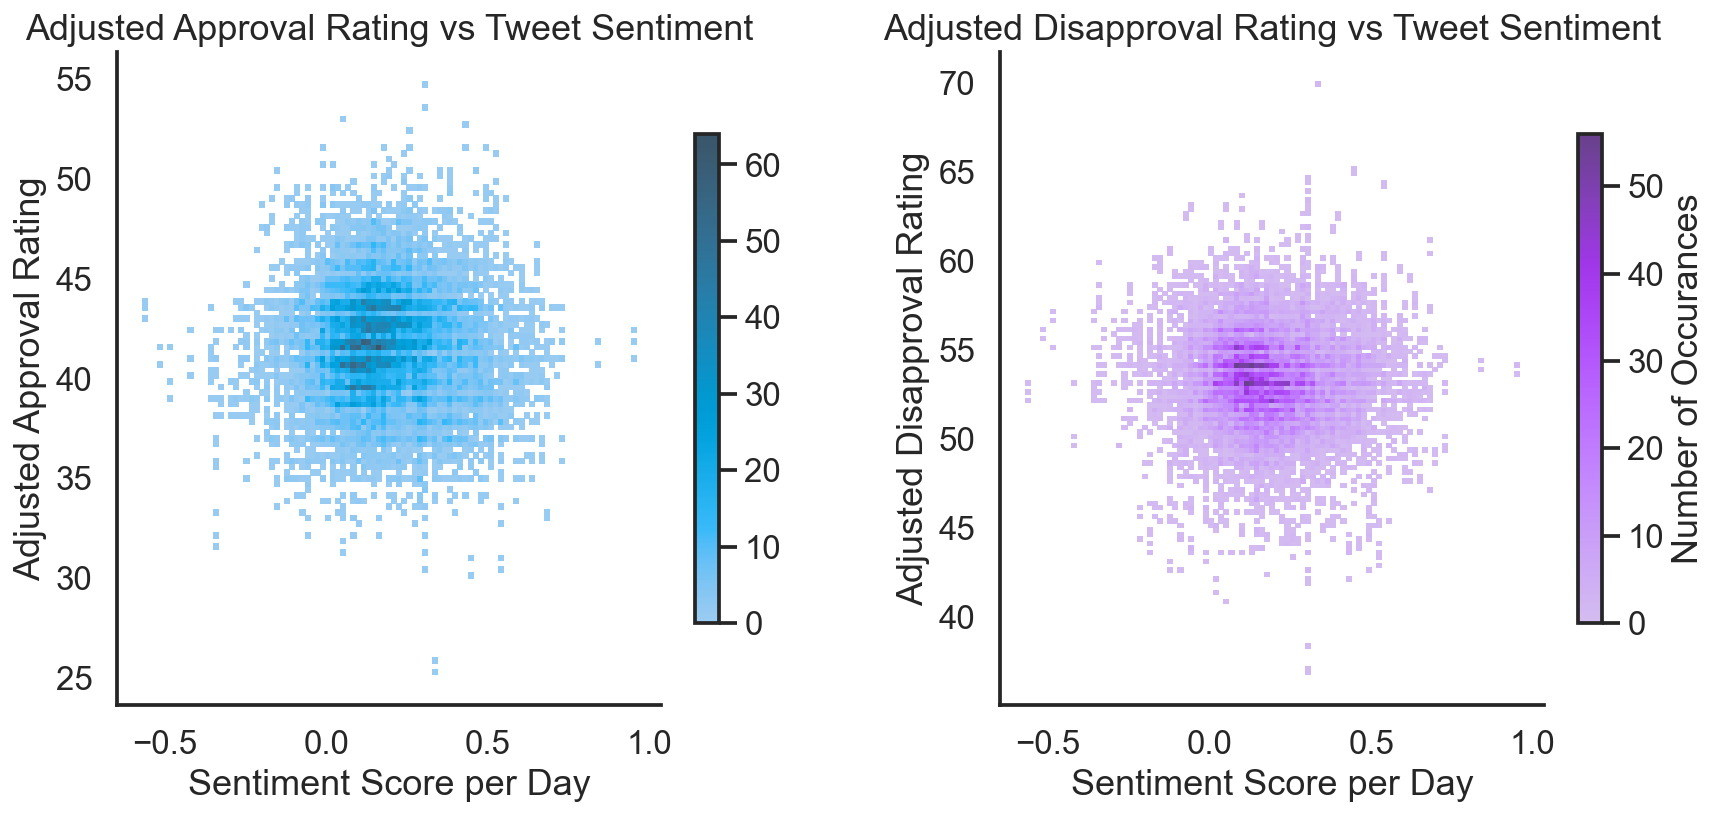

In [99]:
fig, axs = plt.subplots(1,2, figsize=(14, 6), constrained_layout = True)
fig.subplots_adjust(wspace=0.3)

plot1 = sns.histplot(ax=axs[0], x='aggrCompound/day', y='adjustedApprove', data=merged_poll_dropped, color=colors['sentiment_approve'], cbar=True, cbar_kws={'shrink': .75})
plot1.set(title='Adjusted Approval Rating vs Tweet Sentiment', xlabel='Sentiment Score per Day', ylabel='Adjusted Approval Rating')
sns.despine();

plot2 = sns.histplot(ax=axs[1], x='aggrCompound/day', y='adjustedDisapprove', data=merged_poll_dropped, color=colors['sentiment_disapprove'], cbar=True, cbar_kws={'shrink': .75, 'label': 'Number of Occurances'})
plot2.set(title='Adjusted Disapproval Rating vs Tweet Sentiment', xlabel='Sentiment Score per Day', ylabel='Adjusted Disapproval Rating')
sns.despine();

From these graphs, it is hard to tell if there is a correlation between sentiment score and Trump's approval ratings. We will have to run linear regression on it to find out more about the data.

We want to check if our independent variable is normally distributed before we run linear regression on it.

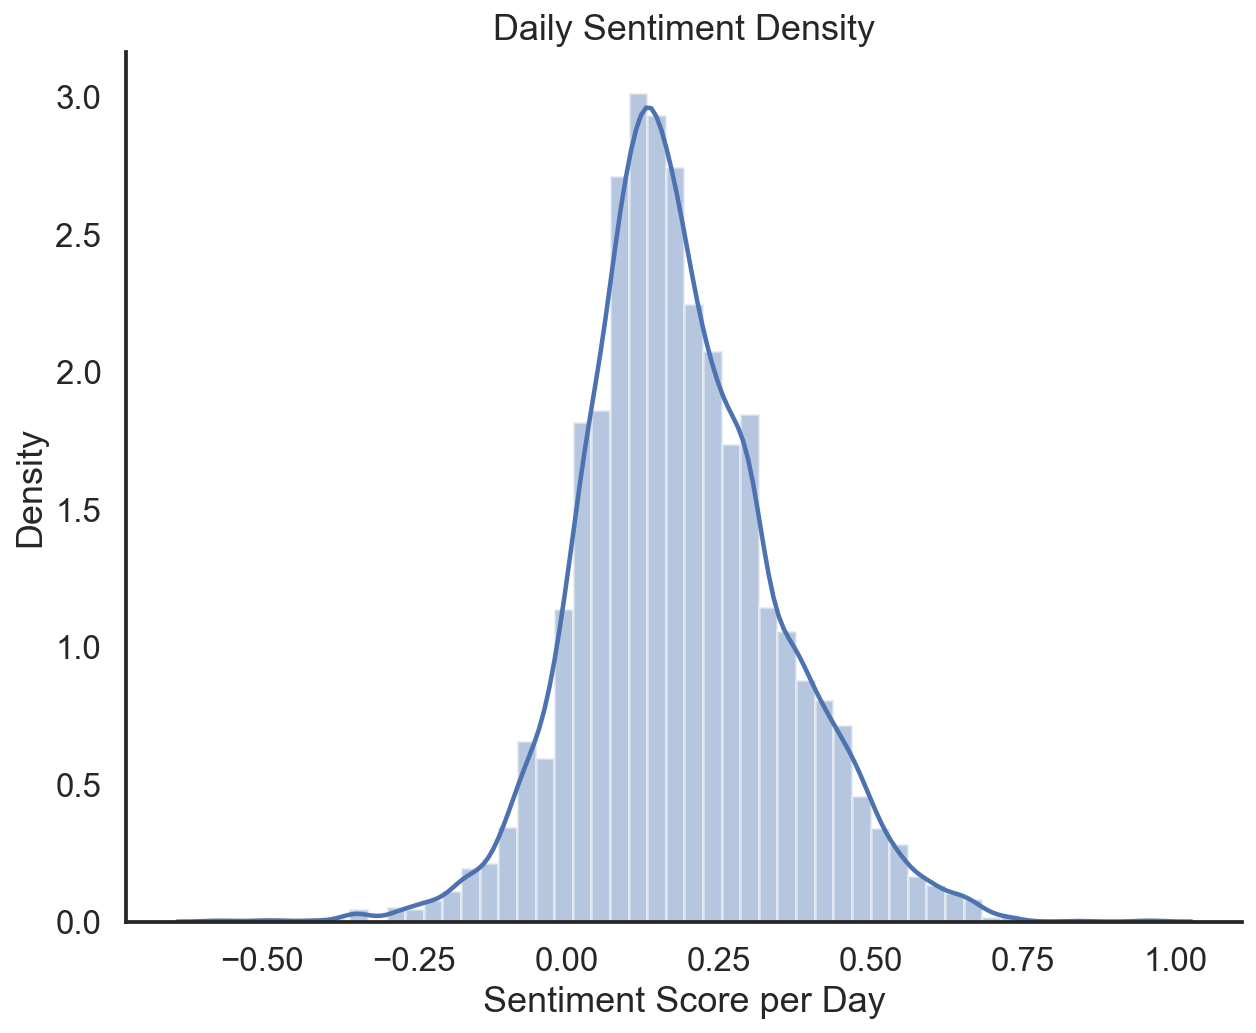

In [100]:
plot = sns.distplot(merged_poll_dropped['aggrCompound/day'])
plot.set(title='Daily Sentiment Density', xlabel='Sentiment Score per Day')
sns.despine();

In [101]:
stats.normaltest(merged_poll_dropped['aggrCompound/day'])

NormaltestResult(statistic=336.96616669717935, pvalue=6.741035397747329e-74)

Since the p-value is very small, our independent variable is relatively normalized, so we can run linear regression on the data we graphed.

In [102]:
outcome_sentiment, predictors_sentiment = patsy.dmatrices('adjustedApprove ~ Q("aggrCompound/day")', merged_poll_dropped)
model_sentiment = sm.OLS(outcome_sentiment, predictors_sentiment)
sentiment_approve = model_sentiment.fit()
print(sentiment_approve.summary())

                            OLS Regression Results                            
Dep. Variable:        adjustedApprove   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.82
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           0.000201
Time:                        13:16:53   Log-Likelihood:                -39005.
No. Observations:               16134   AIC:                         7.801e+04
Df Residuals:                   16132   BIC:                         7.803e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                41.75

In [103]:
outcome_sentiment, predictors_sentiment = patsy.dmatrices('adjustedDisapprove ~ Q("aggrCompound/day")', merged_poll_dropped)
model_sentiment = sm.OLS(outcome_sentiment, predictors_sentiment)
sentiment_disapprove = model_sentiment.fit()
print(sentiment_disapprove.summary())

                            OLS Regression Results                            
Dep. Variable:     adjustedDisapprove   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.58
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           2.03e-06
Time:                        13:16:53   Log-Likelihood:                -38372.
No. Observations:               16134   AIC:                         7.675e+04
Df Residuals:                   16132   BIC:                         7.676e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                53.47

The code above shows the relationship between the average sentiment of Trump's tweets across the polling duration for each poll compared to the ratings of each poll. Once again, there is barely any correlation with extremely small R-squared values. One thing to take note of for the large beta coefficient is that the range of sentiment analysis ranges from -1 to 1, which means the maximum change in approval rating using the full range of the compound sentiment value would be only about a 1% change in approval rating. Since the R-Squared values suggest that the sentiment values only account for 0.1% of the data for both approval and disapproval ratings, we concluded that there is not a significant enough correlation to say that the results did not happen by random chance.

#### Multiple Linear Regression

This time we want to see if accounting for both tweet frequency and tweet sentiment may reveal a more obvious relationship, but before we do so, we need to check for multicollinearity.

In [104]:
merged_poll_dropped.corr()

,weight,adjustedApprove,adjustedDisapprove,sampleSize,tweets/day,aggrCompound/day
weight,1.000000,0.026365,-0.022357,-0.143604,0.070555,-0.022619
adjustedApprove,0.026365,1.000000,-0.802503,-0.069234,0.176198,-0.029260
adjustedDisapprove,-0.022357,-0.802503,1.000000,0.011339,0.016877,-0.037387
sampleSize,-0.143604,-0.069234,0.011339,1.000000,0.242794,-0.078117
tweets/day,0.070555,0.176198,0.016877,0.242794,1.000000,-0.234861
aggrCompound/day,-0.022619,-0.029260,-0.037387,-0.078117,-0.234861,1.000000


Since the correlation between the sentiment variable (aggrCompound/day) and the tweet rate (tweets/day) is at a relatively high value of -0.23, we want to check the variance inflation factor to make sure we can continue with our regression, assuming a value of 5 as the threshold [1]. We also need to drop the polls which do not have tweets associated with them.

1) https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [105]:
# Grabbing the two relevant columns

data = merged_poll_list[['aggrCompound/day', 'normTweetRate']].dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = data.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))] 
  
print(vif_data)

            feature       VIF
0  aggrCompound/day  1.879912
1     normTweetRate  1.879912


In [106]:
outcome_multiple, predictors_multiple = patsy.dmatrices('adjustedApprove ~ Q("aggrCompound/day") + normTweetRate', merged_poll_list)
model_multiple = sm.OLS(outcome_multiple, predictors_multiple)
result_multiple = model_multiple.fit()
print(result_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:        adjustedApprove   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     287.1
Date:                Mon, 15 Mar 2021   Prob (F-statistic):          3.05e-123
Time:                        13:16:53   Log-Likelihood:                -38729.
No. Observations:               16134   AIC:                         7.746e+04
Df Residuals:                   16131   BIC:                         7.749e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                39.64

In [107]:
outcome_multiple, predictors_multiple = patsy.dmatrices('adjustedDisapprove ~ Q("aggrCompound/day") + normTweetRate', merged_poll_list)
model_multiple = sm.OLS(outcome_multiple, predictors_multiple)
result_multiple = model_multiple.fit()
print(result_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:     adjustedDisapprove   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     15.84
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           1.35e-07
Time:                        13:16:53   Log-Likelihood:                -38368.
No. Observations:               16134   AIC:                         7.674e+04
Df Residuals:                   16131   BIC:                         7.676e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                53.21

Once again, we see that the effects of both variables are quite small considering we need to divide the log-scaled tweet rates by 100, account for the fact that the sentiment score ranges from -1 to 1, and that the R-squared values are quite insignificant. Therefore, we failed to find correlation between Trump's tweets and his approval or disapproval rating given we do not take into account the credibility of the polls.

#### Taking Weights into Account: Aggregating Data into Weekly Approval and Disapproval Ratings

Since the data is currently split into many polls, we want to group them into something more usable. We decided to aggregate the data into approval rating per week, using the weights that FiveThirtyEight using the end date of the polls. FiveThirtyEight used the public release dates of the polls for their official approval rating estimates, but since we have access to the end dates of the polls, we will use that instead. The end dates reflect the public opinion of any time before the poll ended, which will highlight the effects of Trump's tweets the most if they do indeed affect public perception. 

In [108]:
# getting a DataFrame with starting and ending dates of each week
weekly_polls = pd.DataFrame(pd.date_range(start = '2017-01-20', end = '2021-01-20', freq='7D')) # weekly incrementing range
# end date is scaled to end on the last day of Trump's presidency
weekly_polls['endDate'] = weekly_polls[0].apply(lambda x: x+datetime.timedelta(days=6)) # adding 6 days to starting day
weekly_polls.columns = ['startDate', 'endDate']
weekly_polls

,startDate,endDate
0,2017-01-20,2017-01-26
1,2017-01-27,2017-02-02
2,2017-02-03,2017-02-09
3,2017-02-10,2017-02-16
4,2017-02-17,2017-02-23
...,...,...
204,2020-12-18,2020-12-24
205,2020-12-25,2020-12-31
206,2021-01-01,2021-01-07
207,2021-01-08,2021-01-14


In [109]:
# Function to get weighted values in a column that falls between the desired dates
def get_weighted_sum(start_date, end_date, column):
    mask = (merged_poll_list['endDate'] >= start_date) & (merged_poll_list['endDate'] <= end_date) # creates a date range
    desired_df = merged_poll_list.loc[mask] # creates a dataframe with desired date range
    total_weight = desired_df['weight'].sum() # Finds the total weight
    return (desired_df['weight']/total_weight * desired_df[column]).sum() # The proportioned weight is multiplied onto the desired data column, then summed

In [110]:
# Aggregating every relevant column and putting them into the new dataframe
weekly_polls['weightedApprove'] = weekly_polls.apply(lambda x: get_weighted_sum(x.startDate, x.endDate, 'adjustedApprove'), axis=1)
weekly_polls['weightedDisapprove'] = weekly_polls.apply(lambda x: get_weighted_sum(x.startDate, x.endDate, 'adjustedDisapprove'), axis=1)
weekly_polls['weightedAggrCompound/day'] = weekly_polls.apply(lambda x: get_weighted_sum(x.startDate, x.endDate, 'aggrCompound/day'), axis=1)
weekly_polls['weightedTweets/day'] = weekly_polls.apply(lambda x: get_weighted_sum(x.startDate, x.endDate, 'tweets/day'), axis=1)

In [111]:
weekly_polls.describe()

,weightedApprove,weightedDisapprove,weightedAggrCompound/day,weightedTweets/day
count,209.000000,209.000000,209.000000,209.000000
mean,41.772106,53.238578,0.179587,17.292793
std,1.760158,1.836712,0.127981,12.983193
min,37.152678,41.756497,-0.138491,0.000000
25%,40.609139,52.373593,0.091103,7.396587
50%,42.159536,53.156842,0.168131,11.861102
75%,42.908452,54.294163,0.258751,24.931201
max,46.339550,57.691904,0.544596,57.759105


#### Linear Regression on Weighted Approval Ratings and Tweet Frequency

In [112]:
stats.normaltest(weekly_polls['weightedTweets/day'])

NormaltestResult(statistic=38.40417494070145, pvalue=4.57761612820399e-09)

Since we confirmed that the p-value of the normal test is quite small for our new independent variable, we can continue with the analysis and do linear regression without any normalization.

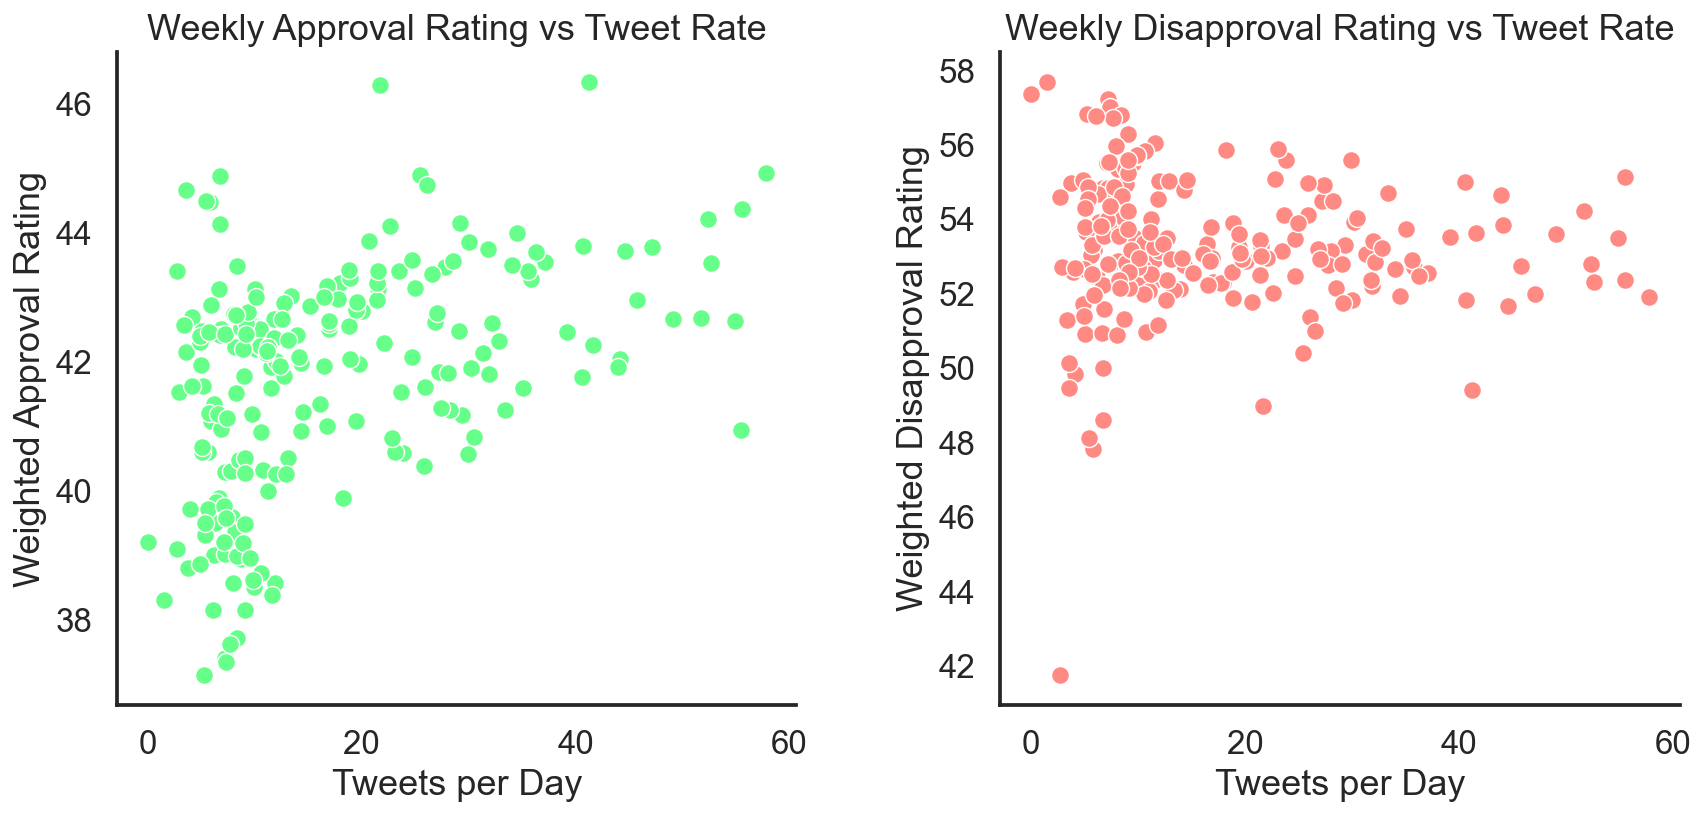

In [113]:
fig, axs = plt.subplots(1,2, figsize=(14, 6), constrained_layout = True)
fig.subplots_adjust(wspace=0.3)

plot1 = sns.scatterplot(ax=axs[0], x='weightedTweets/day', y='weightedApprove', color=colors['approve'], data=weekly_polls)
plot1.set(title='Weekly Approval Rating vs Tweet Rate', xlabel = 'Tweets per Day', ylabel='Weighted Approval Rating')
sns.despine();

plot2 = sns.scatterplot(ax=axs[1], x='weightedTweets/day', y='weightedDisapprove', color=colors['disapprove'], data=weekly_polls)
plot2.set(title='Weekly Disapproval Rating vs Tweet Rate', xlabel = 'Tweets per Day', ylabel='Weighted Disapproval Rating')
sns.despine();

We see an outlier in the disapproval rating graph, so we want to take a closer look.

In [114]:
weekly_polls[weekly_polls['weightedDisapprove'] < 44]

,startDate,endDate,weightedApprove,weightedDisapprove,weightedAggrCompound/day,weightedTweets/day
0,2017-01-20,2017-01-26,43.413228,41.756497,0.28916,2.746319


This was during Trump's initial week in office when he did not tweet as much (he did not tweet for his first 3 days, possibly for security purposes or because he was busy). Since the data is a special case and not indicative of how Trump's tweets throughout the rest of his presidency, we will drop it before running our linear regression for more accurate results. 

In [115]:
weekly_polls = weekly_polls[weekly_polls['weightedDisapprove'] > 44]

In [116]:
outcome_weighted_tweets, predictors_weighted_tweets = patsy.dmatrices('weightedApprove ~ Q("weightedTweets/day")', weekly_polls)
model_weighted_tweets = sm.OLS(outcome_weighted_tweets, predictors_weighted_tweets)
approve_weighted_tweets = model_weighted_tweets.fit()
print(approve_weighted_tweets.summary())

                            OLS Regression Results                            
Dep. Variable:        weightedApprove   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     52.46
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           8.59e-12
Time:                        13:16:55   Log-Likelihood:                -388.71
No. Observations:                 208   AIC:                             781.4
Df Residuals:                     206   BIC:                             788.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

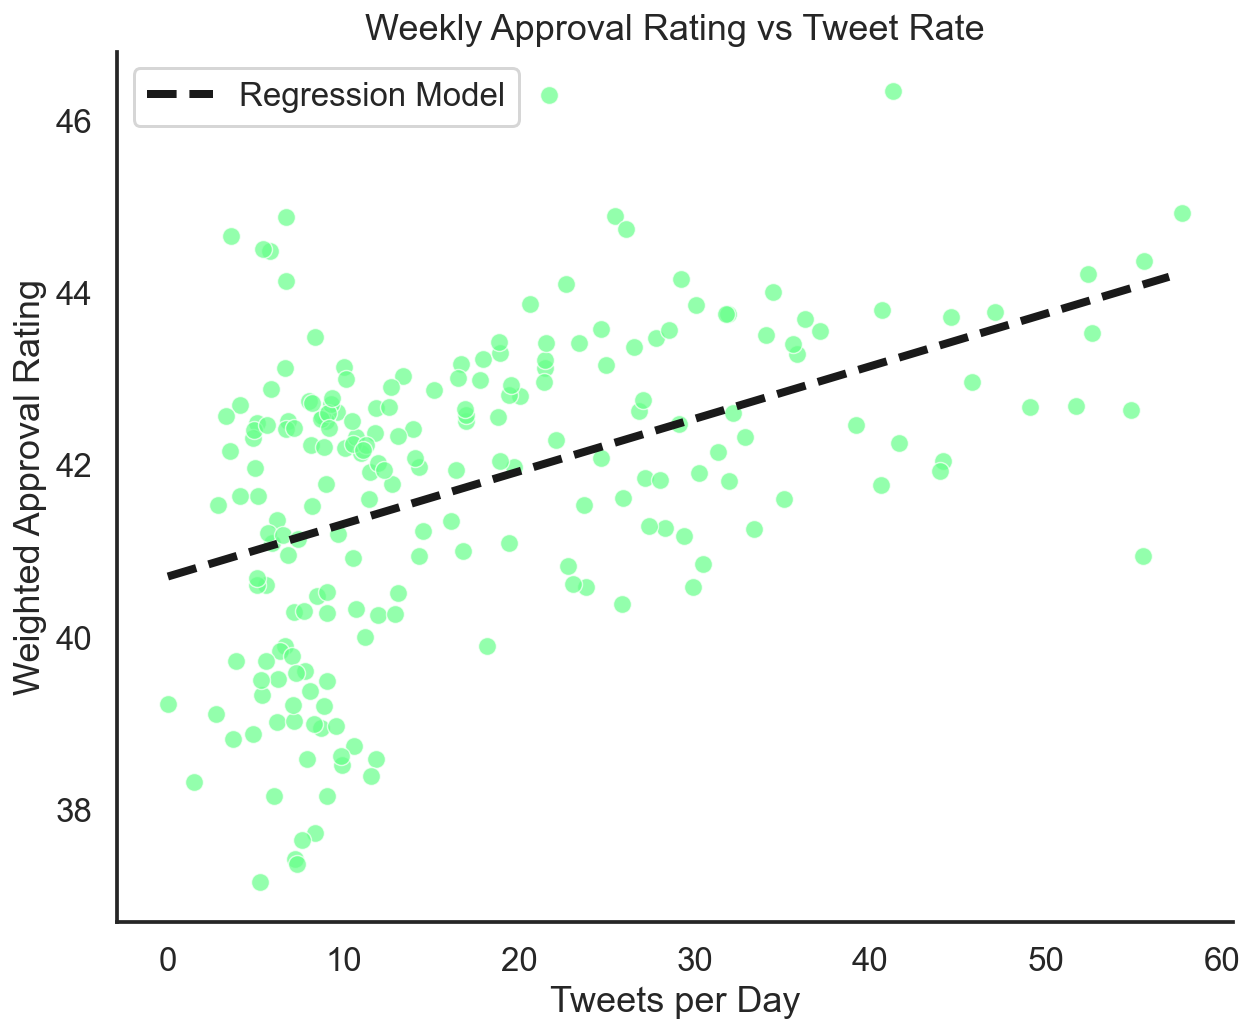

In [117]:
# Plot original graph
plot1 = sns.scatterplot(alpha=0.7, x='weightedTweets/day', y='weightedApprove', color=colors['approve'], data=weekly_polls)
plot1.set(title='Weekly Approval Rating vs Tweet Rate', xlabel = 'Tweets per Day', ylabel='Weighted Approval Rating')
sns.despine();

# Generate and plot the model fit line
xs = np.arange(weekly_polls['weightedTweets/day'].min(), weekly_polls['weightedTweets/day'].max()) # Range of tweet frequency
ys = 0.0611*xs + 40.7027 # Retrieved from OLS regression results
plt.plot(xs, ys, '--k', linewidth=4, label='Regression Model')
plt.legend();

This time, we are using the poll values and tweet frequency aggregated by week and taking into account the credibility and accuracy of each pollster using FiveThirtyEight's weights. We can see from the graph that the data points slightly curve which could be fit by a different model better. However, we felt that our findings with a linear model should be sufficient for our purposes since we do not have context for his tweets to understand more advanced regression results. Although the values are still low, we can see that the R-squared value is significantly higher than before, suggesting the tweet frequency is accounting for 20% of the shift in Trump's approval rating. Since the p-value is small, we can say that for each additional tweet per day that Trump wrote, his approval rating increased by 0.06%, highlighting that the more Trump tweeted, the better his approval rating, even if it was only slightly.

In [118]:
outcome_weighted_tweets, predictors_weighted_tweets = patsy.dmatrices('weightedDisapprove ~ Q("weightedTweets/day")', weekly_polls)
model_weighted_tweets = sm.OLS(outcome_weighted_tweets, predictors_weighted_tweets)
disapprove_weighted_tweets = model_weighted_tweets.fit()
print(disapprove_weighted_tweets.summary())

                            OLS Regression Results                            
Dep. Variable:     weightedDisapprove   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.696
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.194
Time:                        13:16:55   Log-Likelihood:                -398.99
No. Observations:                 208   AIC:                             802.0
Df Residuals:                     206   BIC:                             808.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Like the outcome without accounting for the weights, the linear regression suggests that there is not a very strong correlation between Trump's tweet frequency and his disapproval rating.

#### Linear Regression on Weighted Sentiment Analysis

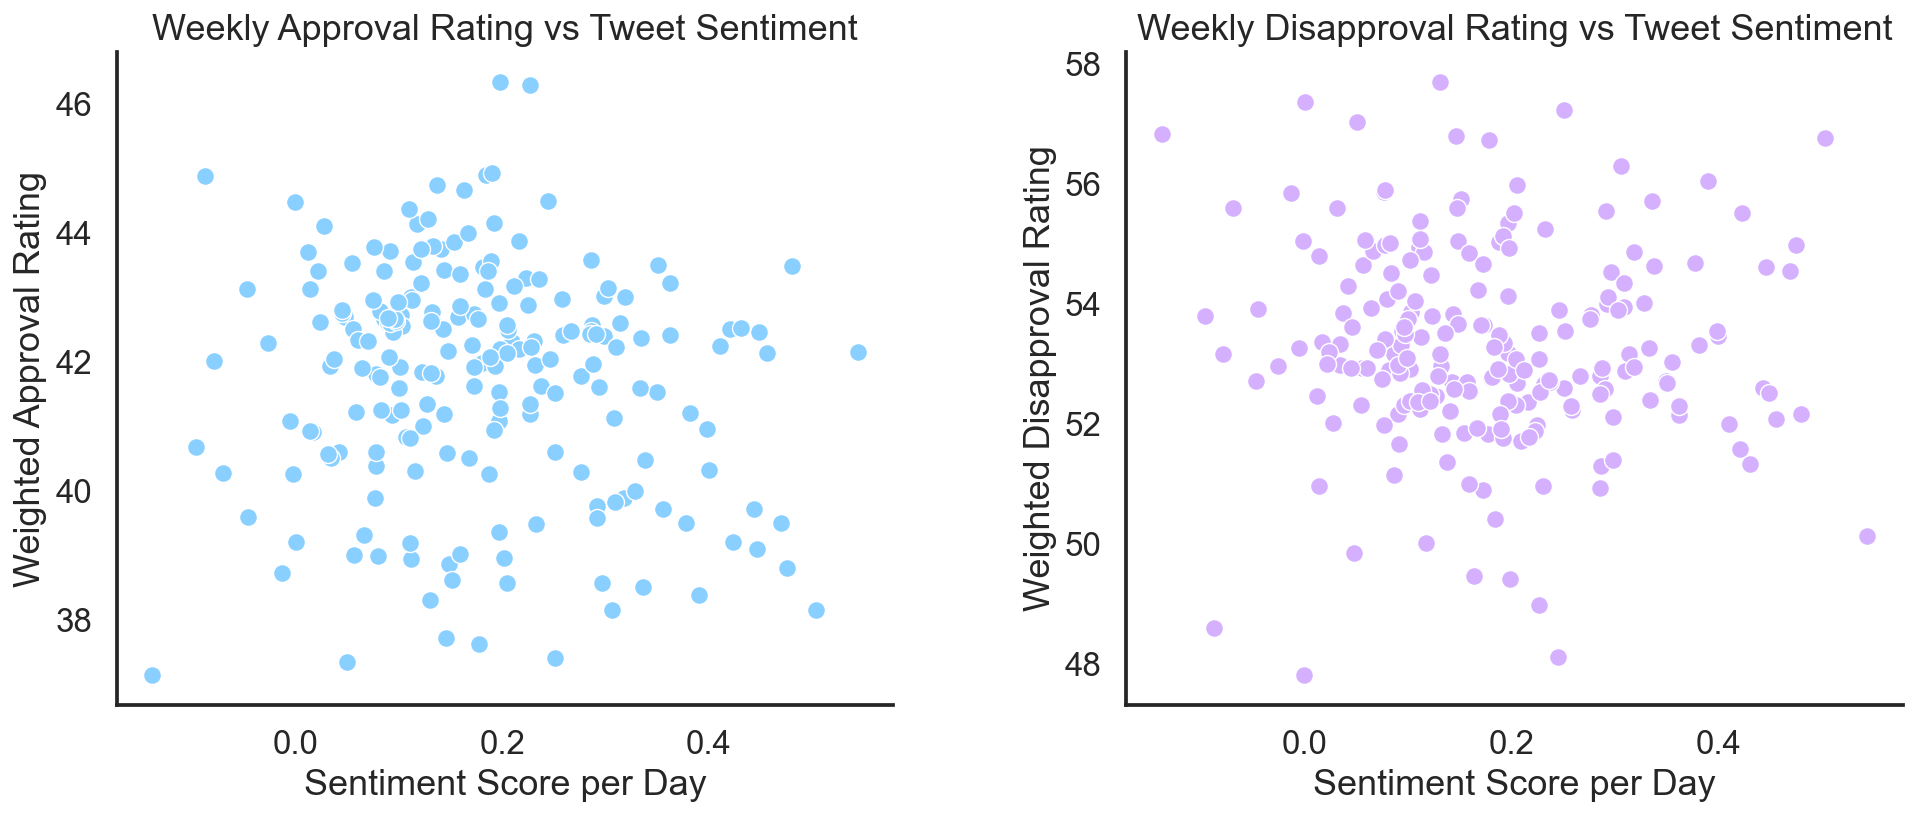

In [119]:
fig, axs = plt.subplots(1,2, figsize=(16, 6), constrained_layout = True)
fig.subplots_adjust(wspace=0.3)

plot1 = sns.scatterplot(ax=axs[0], x='weightedAggrCompound/day', y='weightedApprove', color=colors['sentiment_approve'], data=weekly_polls)
plot1.set(title='Weekly Approval Rating vs Tweet Sentiment', xlabel='Sentiment Score per Day', ylabel='Weighted Approval Rating')
sns.despine();

plot2 = sns.scatterplot(ax=axs[1], x='weightedAggrCompound/day', y='weightedDisapprove', color=colors['sentiment_disapprove'], data=weekly_polls)
plot2.set(title='Weekly Disapproval Rating vs Tweet Sentiment', xlabel='Sentiment Score per Day', ylabel='Weighted Disapproval Rating')
sns.despine();

In [120]:
outcome_sentiment, predictors_sentiment = patsy.dmatrices('weightedApprove ~ Q("weightedAggrCompound/day")', weekly_polls)
model_sentiment = sm.OLS(outcome_sentiment, predictors_sentiment)
result_sentiment = model_sentiment.fit()
print(result_sentiment.summary())

                            OLS Regression Results                            
Dep. Variable:        weightedApprove   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.249
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.135
Time:                        13:16:55   Log-Likelihood:                -411.18
No. Observations:                 208   AIC:                             826.4
Df Residuals:                     206   BIC:                             833.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [121]:
outcome_sentiment, predictors_sentiment = patsy.dmatrices('weightedDisapprove ~ Q("weightedAggrCompound/day")', weekly_polls)
model_sentiment = sm.OLS(outcome_sentiment, predictors_sentiment)
result_sentiment = model_sentiment.fit()
print(result_sentiment.summary())

                            OLS Regression Results                            
Dep. Variable:     weightedDisapprove   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5882
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.444
Time:                        13:16:55   Log-Likelihood:                -399.54
No. Observations:                 208   AIC:                             803.1
Df Residuals:                     206   BIC:                             809.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

This time we can more clearly see that the aggregated sentiment values are not reflected in the poll ratings, with much higher p-values and small R-squared values. Since Trump makes a variety of tweets throughout each week, whether it be praising people or criticizing others, the overall effect of the tweets does not have any significant influence on his public perception. 

#### Multiple Linear Regression on Weighted Data

Once again, we check for multicollinearity.

In [122]:
weekly_polls.corr()

,weightedApprove,weightedDisapprove,weightedAggrCompound/day,weightedTweets/day
weightedApprove,1.000000,-0.836762,-0.103931,0.450538
weightedDisapprove,-0.836762,1.000000,-0.053361,-0.090368
weightedAggrCompound/day,-0.103931,-0.053361,1.000000,-0.281001
weightedTweets/day,0.450538,-0.090368,-0.281001,1.000000


In [123]:
# Grabbing the two relevant columns

data = weekly_polls[['weightedAggrCompound/day', 'weightedTweets/day']]

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = data.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))] 
  
print(vif_data)

                    feature       VIF
0  weightedAggrCompound/day  1.445378
1        weightedTweets/day  1.445378


The VIF values are much less than 5 so we can proceed.

In [124]:
outcome_multiple, predictors_multiple = patsy.dmatrices('weightedApprove ~ Q("weightedAggrCompound/day") + Q("weightedTweets/day")', weekly_polls)
model_multiple = sm.OLS(outcome_multiple, predictors_multiple)
result_multiple = model_multiple.fit()
print(result_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:        weightedApprove   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     26.19
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           7.40e-11
Time:                        13:16:56   Log-Likelihood:                -388.64
No. Observations:                 208   AIC:                             783.3
Df Residuals:                     205   BIC:                             793.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The multiple linear regression shows similar results as before, but it particularity highlights how the compound sentiment value is not related to the approval rating with a 70.5% chance that the relationship is caused by a random distribution (p-value). 

In [125]:
outcome_multiple, predictors_multiple = patsy.dmatrices('weightedDisapprove ~ Q("weightedAggrCompound/day") + Q("weightedTweets/day")', weekly_polls)
model_multiple = sm.OLS(outcome_multiple, predictors_multiple)
result_multiple = model_multiple.fit()
print(result_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:     weightedDisapprove   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.550
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.215
Time:                        13:16:56   Log-Likelihood:                -398.28
No. Observations:                 208   AIC:                             802.6
Df Residuals:                     205   BIC:                             812.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Once again, the regression shows that there is not a visible correlation between the variables, with high p-values and a low R-squared value.

# Ethics and Privacy

- The two datasets we used are both public information that does not affect individuals. President Trump's tweets were public data before his Twitter account was removed, but archives (like the one we used) are still available to the public. Trump's tweet content was viewed as potentially dangerous, which led to the suspension of his account at the time. A reasonable amount of time has passed since his presidency and the contents should not be as sensitive anymore, especially considering that all of it is public already. Since the polling data have already been heavily aggregated and we only show the results of the polls, there should be no privacy breach concerns with the people who were polled. 


- Although polls are inherently biased based on how and/or by whom the polls were conducted, we used the adjusted polling data, we minimized the effects of these biases in the data by using the adjusted rating from FiveThirtyEight, which is a widely trusted and credible source, and took their weights into account when we did our analyses.


- Our analysis is of a public political figure and results may frustrate/anger a portion of the population. However, we tried to remain impartial during the analysis of the data and only look at the facts that we derived from the data to come to any conclusions.


- The impact of our results would mainly impact Trump if anyone. Our result was focused solely on his tweet frequency and content and thus would need much more work to extrapolate to other politicians with different backgrounds. To be able to compare other politicians to Trump and come to an extrapolated conclusion they would need to have a comparably large Twitter following, an important government position, and be spotlighted by many media outlets at both national and international levels.


- Since we are considering the data directly and the results do not present any individuals' opinion about President Trump, the public's perception of Trump would not largely change unless they have never seen Trump's approval ratings before, but that is not affected by the results of our project.  

- To respect Twitter's wishes, we have opted to exclude all deleted tweets from our analysis.

# Conclusion & Discussion

#### Summary
The original goal of our project was to see if former President Trump's tweeting habits (frequency) and the content (sentiment) of his tweets affected the public's view of him during his presidency (approval/disapproval ratings). We chose to use a comprehensive dataset of his tweets and a dataset from FiveThirtyEight's aggregation of a significant number of polls that were used to calculate Trump's approval rating. Since we must follow Twitter's guidelines of using tweet data, part of our limitations is that we are required to not include deleted tweets in our analysis. Another part of our limitations is that since Trump's Twitter account was suspended towards the end of his presidency, we also do not have any data for his last few weeks in office.

#### Analysis Process
Since we wanted to look at the frequency and sentiment of Trump's tweets, we needed to combine the datasets of Trump's tweets with the many polls on his approval rating. We found a tweet per day value for each poll to join the tweet frequency to the polling data. Following that, we did sentiment analysis on Trump’s tweet content. Similar to the tweet frequency, we found a sentiment value per day value for each poll. After that, we ran linear regression on the tweet frequency and tweet sentiments on the approval ratings. We also ran multiple linear regression on the data to see if there would be any changes. After not finding any significant results, we aggregated the polls into weekly poll scores and scaled the value of the polls using the weights assigned by FiveThirtyEight, and repeated the linear regression process for tweet frequency, compound sentiment scores, and finally, a multiple linear regression. Our analysis was limited in how we aggregated the data. Since each poll has different starting and ending dates, there was no way to aggregate the data in a way where we did not lose data. In the end, we chose to aggregate the polls by aggregating the end dates by weeks because any effects of the tweets will be seen after the polls end and weekly scores gave us enough granularity to run a reasonable linear regression model. This made it difficult to get an accurate sentiment analysis because information starts to get lost when the numbers are averaged. Another limitation was that we could not extract context or links and videos that were associated with the tweets when we were doing text analysis, meaning that we were losing out on a portion of the information associated with the tweets.

#### Our Findings and Impact
We arrived at four separate conclusions in terms of our original hypotheses. First, looking at the linear regression summary for weekly tweet frequency and Trump's approval rating, we can reasonably say that there is a positive, albeit small, correlation between the tweet frequency and approval ratings. Secondly, we failed to find a correlation when we compared the frequency of the tweets to the disapproval rating. Finally, we failed to find a correlation between the compound sentiment score of Trump's tweets compared to either his approval or disapproval ratings. From these conclusions, the most interesting finding is that the more Trump tweets, the better his approval rating but his disapproval rating is unaffected. This result disproves our original hypothesis that Trump's tweets will cause more people to disapprove of him because of his unrestrained manner of tweeting. A possible explanation of this result could be that the people who consistently see Trump's tweets have their perception of Trump skewed by the content of his tweets. Social media platforms are often criticized for the echo chamber effect where users often see what they like to see and never see content that they disagree with. Therefore, the people who see Trump's tweets may believe the content that Trump is tweeting about, and thus, increasing their trust and agreement with the former president. Meanwhile, those who do not like Trump are not affected by the tweets that they do not see. In the setting of the United States government system, these echo chambers would not be ideal since no one is listening to the other side and are only listening to each other. The idea of a democracy is for the people to discuss and debate important issues, but this cannot happen in the presence of echo chambers, thereby hindering the effectiveness of the government system we have set up.

# Team Contributions

<table style="float: left;">
    <tr>
        <th>Name</th>
        <th>Contributions</th>
    </tr>
    <tr>
        <td>Charles Lee</td>
        <td>Data Cleaning, EDA, Data Visualization, Analysis, Notebook Cleanup, Video Script</td>
    </tr>
    <tr>
        <td>Brian Nguyen</td>
        <td>Data Cleaning, EDA, Data Visualization, Text Analysis, Text Cleaning, Video Script & Slides</td>
    </tr>
    <tr>
        <td>James Chen</td>
        <td>Background and Prior Work, Analysis, EDA, Conclusion & Discussion, Video Script & Slides</td>
    </tr>
    <tr>
        <td>Andrew Kahr</td>
        <td>EDA, Data Visualization, Text Cleaning, Lots of Polishing, Video Recording & Editing</td>
    </tr>
</table> 

For the most part, we worked on the project together. Contributions mainly represent who did the commit.